### UCI energy efficiency dataset. 

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import pandas as pd

In [14]:
df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [15]:
def inp_out_separation(df):    
    return df.iloc[:,:8].values, df['Y1'].values, df['Y2'].values
def input_preprocessing(df):
    train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
    return train, test
def norm(data, mean, std):
    return (data-mean)/std

In [16]:
train, test = input_preprocessing(df)

In [24]:
train_stats = train.describe().transpose().iloc[:8]
train_mean = train_stats['mean'].values
train_std = train_stats['std'].values

test_stats = test.describe().transpose().iloc[:8]
test_mean = test_stats['mean'].values
test_std = test_stats['std'].values

test_mean, train_mean

(array([7.74090909e-01, 6.63250000e+02, 3.17227273e+02, 1.73011364e+02,
        5.36363636e+00, 3.45454545e+00, 2.30194805e-01, 2.86363636e+00]),
 array([7.61677524e-01, 6.73829805e+02, 3.18819218e+02, 1.77505293e+02,
        5.22149837e+00, 3.51140065e+00, 2.35423453e-01, 2.79967427e+00]))

In [30]:
X_train, y1_train, y2_train = inp_out_separation(train)
X_test, y1_test, y2_test = inp_out_separation(test)
x_train = norm(X_train, train_mean, train_std)
x_test = norm(X_test, test_mean, test_std)

print("train max: ", x_train.max())
print("test max: ", x_test.max())
y_train = (y1_train, y2_train)
y_test = (y1_test, y2_test)

train max:  2.2540356440583493
test max:  2.2115851534835573


In [31]:
x_train.shape

(614, 8)

#### Model Architecture

In [35]:
input_layer = Input(shape=(x_train.shape[1]), name='Input')
dense_1 = Dense(128, activation='relu', name='First_Dense_Layer')(input_layer)
dense_2 = Dense(128, activation='relu', name='Second_Dense_Layer')(dense_1)
y1_output = Dense(1, name='y1_output')(dense_2)
dense_3 = Dense(64, activation='relu', name='third_Dense_Layer')(dense_2)
y2_output = Dense(1, name='y2_output')(dense_3)

# define the model with input and output (list)

model = Model(inputs=input_layer, outputs=[y1_output, y2_output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 8)]          0                                            
__________________________________________________________________________________________________
First_Dense_Layer (Dense)       (None, 128)          1152        Input[0][0]                      
__________________________________________________________________________________________________
Second_Dense_Layer (Dense)      (None, 128)          16512       First_Dense_Layer[0][0]          
__________________________________________________________________________________________________
third_Dense_Layer (Dense)       (None, 64)           8256        Second_Dense_Layer[0][0]         
____________________________________________________________________________________________

In [36]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss={'y1_output':'mse', 
                    'y2_output':'mse'},
              metrics={'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output':tf.keras.metrics.RootMeanSquaredError()})

In [37]:
model.fit(x_train, y_train, 
          epochs=2000, batch_size=10, 
          validation_data=(x_test, y_test))

model.evaluate(x=x_test, y=y_test)


Epoch 1/2000
62/62 [==============================] - 3s 18ms/step - loss: 519.3835 - y1_output_loss: 251.8151 - y2_output_loss: 267.5684 - y1_output_root_mean_squared_error: 15.2290 - y2_output_root_mean_squared_error: 15.6793 - val_loss: 36.6253 - val_y1_output_loss: 15.9687 - val_y2_output_loss: 20.6566 - val_y1_output_root_mean_squared_error: 3.9961 - val_y2_output_root_mean_squared_error: 4.5450
Epoch 2/2000
62/62 [==============================] - 0s 3ms/step - loss: 31.7914 - y1_output_loss: 12.4835 - y2_output_loss: 19.3078 - y1_output_root_mean_squared_error: 3.5213 - y2_output_root_mean_squared_error: 4.3871 - val_loss: 24.5834 - val_y1_output_loss: 11.1702 - val_y2_output_loss: 13.4132 - val_y1_output_root_mean_squared_error: 3.3422 - val_y2_output_root_mean_squared_error: 3.6624
Epoch 3/2000
62/62 [==============================] - 0s 3ms/step - loss: 30.1648 - y1_output_loss: 11.1711 - y2_output_loss: 18.9937 - y1_output_root_mean_squared_error: 3.3313 - y2_output_root_mea

Epoch 22/2000
62/62 [==============================] - 0s 4ms/step - loss: 15.9931 - y1_output_loss: 5.9333 - y2_output_loss: 10.0599 - y1_output_root_mean_squared_error: 2.4261 - y2_output_root_mean_squared_error: 3.1535 - val_loss: 27.3366 - val_y1_output_loss: 10.3281 - val_y2_output_loss: 17.0086 - val_y1_output_root_mean_squared_error: 3.2137 - val_y2_output_root_mean_squared_error: 4.1241
Epoch 23/2000
62/62 [==============================] - 0s 4ms/step - loss: 15.3181 - y1_output_loss: 6.5599 - y2_output_loss: 8.7582 - y1_output_root_mean_squared_error: 2.5579 - y2_output_root_mean_squared_error: 2.9561 - val_loss: 14.1027 - val_y1_output_loss: 6.5782 - val_y2_output_loss: 7.5245 - val_y1_output_root_mean_squared_error: 2.5648 - val_y2_output_root_mean_squared_error: 2.7431
Epoch 24/2000
62/62 [==============================] - 0s 4ms/step - loss: 14.8513 - y1_output_loss: 5.4864 - y2_output_loss: 9.3649 - y1_output_root_mean_squared_error: 2.3393 - y2_output_root_mean_squared_

Epoch 43/2000
62/62 [==============================] - 0s 3ms/step - loss: 7.3239 - y1_output_loss: 2.6035 - y2_output_loss: 4.7204 - y1_output_root_mean_squared_error: 1.6115 - y2_output_root_mean_squared_error: 2.1681 - val_loss: 8.2355 - val_y1_output_loss: 3.2502 - val_y2_output_loss: 4.9852 - val_y1_output_root_mean_squared_error: 1.8028 - val_y2_output_root_mean_squared_error: 2.2328
Epoch 44/2000
62/62 [==============================] - 0s 3ms/step - loss: 9.8633 - y1_output_loss: 3.6208 - y2_output_loss: 6.2424 - y1_output_root_mean_squared_error: 1.8890 - y2_output_root_mean_squared_error: 2.4804 - val_loss: 17.3927 - val_y1_output_loss: 4.0773 - val_y2_output_loss: 13.3155 - val_y1_output_root_mean_squared_error: 2.0192 - val_y2_output_root_mean_squared_error: 3.6490
Epoch 45/2000
62/62 [==============================] - 0s 3ms/step - loss: 9.4073 - y1_output_loss: 3.1268 - y2_output_loss: 6.2805 - y1_output_root_mean_squared_error: 1.7642 - y2_output_root_mean_squared_error:

Epoch 64/2000
62/62 [==============================] - 0s 3ms/step - loss: 7.1198 - y1_output_loss: 2.0268 - y2_output_loss: 5.0930 - y1_output_root_mean_squared_error: 1.4190 - y2_output_root_mean_squared_error: 2.2424 - val_loss: 5.5443 - val_y1_output_loss: 2.0932 - val_y2_output_loss: 3.4511 - val_y1_output_root_mean_squared_error: 1.4468 - val_y2_output_root_mean_squared_error: 1.8577
Epoch 65/2000
62/62 [==============================] - 0s 3ms/step - loss: 5.0260 - y1_output_loss: 1.4466 - y2_output_loss: 3.5794 - y1_output_root_mean_squared_error: 1.2000 - y2_output_root_mean_squared_error: 1.8883 - val_loss: 5.7290 - val_y1_output_loss: 2.5785 - val_y2_output_loss: 3.1505 - val_y1_output_root_mean_squared_error: 1.6058 - val_y2_output_root_mean_squared_error: 1.7750
Epoch 66/2000
62/62 [==============================] - 0s 4ms/step - loss: 4.4453 - y1_output_loss: 1.3793 - y2_output_loss: 3.0660 - y1_output_root_mean_squared_error: 1.1710 - y2_output_root_mean_squared_error: 1

Epoch 85/2000
62/62 [==============================] - 0s 4ms/step - loss: 3.5340 - y1_output_loss: 0.9890 - y2_output_loss: 2.5450 - y1_output_root_mean_squared_error: 0.9903 - y2_output_root_mean_squared_error: 1.5885 - val_loss: 5.7038 - val_y1_output_loss: 1.9714 - val_y2_output_loss: 3.7324 - val_y1_output_root_mean_squared_error: 1.4041 - val_y2_output_root_mean_squared_error: 1.9319
Epoch 86/2000
62/62 [==============================] - 0s 4ms/step - loss: 3.1341 - y1_output_loss: 1.0504 - y2_output_loss: 2.0837 - y1_output_root_mean_squared_error: 1.0158 - y2_output_root_mean_squared_error: 1.4397 - val_loss: 4.0127 - val_y1_output_loss: 1.6247 - val_y2_output_loss: 2.3880 - val_y1_output_root_mean_squared_error: 1.2746 - val_y2_output_root_mean_squared_error: 1.5453
Epoch 87/2000
62/62 [==============================] - 0s 4ms/step - loss: 2.8292 - y1_output_loss: 0.8648 - y2_output_loss: 1.9644 - y1_output_root_mean_squared_error: 0.9263 - y2_output_root_mean_squared_error: 1

Epoch 106/2000
62/62 [==============================] - 0s 4ms/step - loss: 15.2476 - y1_output_loss: 4.7285 - y2_output_loss: 10.5191 - y1_output_root_mean_squared_error: 2.0366 - y2_output_root_mean_squared_error: 3.1010 - val_loss: 6.4895 - val_y1_output_loss: 2.3638 - val_y2_output_loss: 4.1257 - val_y1_output_root_mean_squared_error: 1.5375 - val_y2_output_root_mean_squared_error: 2.0312
Epoch 107/2000
62/62 [==============================] - 0s 4ms/step - loss: 2.8567 - y1_output_loss: 0.7699 - y2_output_loss: 2.0868 - y1_output_root_mean_squared_error: 0.8732 - y2_output_root_mean_squared_error: 1.4366 - val_loss: 13.2093 - val_y1_output_loss: 4.3011 - val_y2_output_loss: 8.9082 - val_y1_output_root_mean_squared_error: 2.0739 - val_y2_output_root_mean_squared_error: 2.9847
Epoch 108/2000
62/62 [==============================] - 0s 4ms/step - loss: 5.7047 - y1_output_loss: 1.5607 - y2_output_loss: 4.1440 - y1_output_root_mean_squared_error: 1.2360 - y2_output_root_mean_squared_er

Epoch 127/2000
62/62 [==============================] - 0s 3ms/step - loss: 2.6263 - y1_output_loss: 0.4955 - y2_output_loss: 2.1308 - y1_output_root_mean_squared_error: 0.7004 - y2_output_root_mean_squared_error: 1.4358 - val_loss: 7.9643 - val_y1_output_loss: 1.7159 - val_y2_output_loss: 6.2484 - val_y1_output_root_mean_squared_error: 1.3099 - val_y2_output_root_mean_squared_error: 2.4997
Epoch 128/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.4462 - y1_output_loss: 0.3760 - y2_output_loss: 1.0702 - y1_output_root_mean_squared_error: 0.6082 - y2_output_root_mean_squared_error: 1.0334 - val_loss: 13.5427 - val_y1_output_loss: 3.3109 - val_y2_output_loss: 10.2318 - val_y1_output_root_mean_squared_error: 1.8196 - val_y2_output_root_mean_squared_error: 3.1987
Epoch 129/2000
62/62 [==============================] - 0s 3ms/step - loss: 2.6005 - y1_output_loss: 0.6076 - y2_output_loss: 1.9929 - y1_output_root_mean_squared_error: 0.7546 - y2_output_root_mean_squared_err

Epoch 148/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.8927 - y1_output_loss: 0.3264 - y2_output_loss: 1.5662 - y1_output_root_mean_squared_error: 0.5708 - y2_output_root_mean_squared_error: 1.2474 - val_loss: 3.8750 - val_y1_output_loss: 1.2422 - val_y2_output_loss: 2.6328 - val_y1_output_root_mean_squared_error: 1.1145 - val_y2_output_root_mean_squared_error: 1.6226
Epoch 149/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.8915 - y1_output_loss: 0.3932 - y2_output_loss: 1.4983 - y1_output_root_mean_squared_error: 0.6244 - y2_output_root_mean_squared_error: 1.2113 - val_loss: 3.2027 - val_y1_output_loss: 0.9514 - val_y2_output_loss: 2.2512 - val_y1_output_root_mean_squared_error: 0.9754 - val_y2_output_root_mean_squared_error: 1.5004
Epoch 150/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.7238 - y1_output_loss: 0.4226 - y2_output_loss: 1.3012 - y1_output_root_mean_squared_error: 0.6455 - y2_output_root_mean_squared_error

Epoch 169/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.6201 - y1_output_loss: 0.2641 - y2_output_loss: 1.3560 - y1_output_root_mean_squared_error: 0.5118 - y2_output_root_mean_squared_error: 1.1583 - val_loss: 3.0688 - val_y1_output_loss: 1.2795 - val_y2_output_loss: 1.7893 - val_y1_output_root_mean_squared_error: 1.1311 - val_y2_output_root_mean_squared_error: 1.3377
Epoch 170/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.4654 - y1_output_loss: 0.3323 - y2_output_loss: 1.1332 - y1_output_root_mean_squared_error: 0.5732 - y2_output_root_mean_squared_error: 1.0629 - val_loss: 3.3951 - val_y1_output_loss: 1.2724 - val_y2_output_loss: 2.1228 - val_y1_output_root_mean_squared_error: 1.1280 - val_y2_output_root_mean_squared_error: 1.4570
Epoch 171/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.2111 - y1_output_loss: 0.2397 - y2_output_loss: 0.9714 - y1_output_root_mean_squared_error: 0.4872 - y2_output_root_mean_squared_error

Epoch 190/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.0489 - y1_output_loss: 0.2110 - y2_output_loss: 0.8379 - y1_output_root_mean_squared_error: 0.4583 - y2_output_root_mean_squared_error: 0.9100 - val_loss: 2.7400 - val_y1_output_loss: 0.9125 - val_y2_output_loss: 1.8275 - val_y1_output_root_mean_squared_error: 0.9552 - val_y2_output_root_mean_squared_error: 1.3519
Epoch 191/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.6270 - y1_output_loss: 0.3023 - y2_output_loss: 1.3248 - y1_output_root_mean_squared_error: 0.5442 - y2_output_root_mean_squared_error: 1.1434 - val_loss: 2.7683 - val_y1_output_loss: 0.9221 - val_y2_output_loss: 1.8462 - val_y1_output_root_mean_squared_error: 0.9603 - val_y2_output_root_mean_squared_error: 1.3588
Epoch 192/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.8590 - y1_output_loss: 0.3056 - y2_output_loss: 1.5533 - y1_output_root_mean_squared_error: 0.5491 - y2_output_root_mean_squared_error

Epoch 211/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.9317 - y1_output_loss: 0.2195 - y2_output_loss: 0.7122 - y1_output_root_mean_squared_error: 0.4667 - y2_output_root_mean_squared_error: 0.8427 - val_loss: 10.2765 - val_y1_output_loss: 2.7624 - val_y2_output_loss: 7.5142 - val_y1_output_root_mean_squared_error: 1.6620 - val_y2_output_root_mean_squared_error: 2.7412
Epoch 212/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.6074 - y1_output_loss: 0.2984 - y2_output_loss: 1.3090 - y1_output_root_mean_squared_error: 0.5434 - y2_output_root_mean_squared_error: 1.1340 - val_loss: 2.6452 - val_y1_output_loss: 0.9655 - val_y2_output_loss: 1.6798 - val_y1_output_root_mean_squared_error: 0.9826 - val_y2_output_root_mean_squared_error: 1.2961
Epoch 213/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.9620 - y1_output_loss: 0.2168 - y2_output_loss: 0.7452 - y1_output_root_mean_squared_error: 0.4628 - y2_output_root_mean_squared_erro

Epoch 232/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.0084 - y1_output_loss: 0.2030 - y2_output_loss: 0.8054 - y1_output_root_mean_squared_error: 0.4494 - y2_output_root_mean_squared_error: 0.8927 - val_loss: 2.3805 - val_y1_output_loss: 0.7761 - val_y2_output_loss: 1.6043 - val_y1_output_root_mean_squared_error: 0.8810 - val_y2_output_root_mean_squared_error: 1.2666
Epoch 233/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.2679 - y1_output_loss: 0.2529 - y2_output_loss: 1.0150 - y1_output_root_mean_squared_error: 0.5001 - y2_output_root_mean_squared_error: 1.0007 - val_loss: 3.5035 - val_y1_output_loss: 1.2777 - val_y2_output_loss: 2.2258 - val_y1_output_root_mean_squared_error: 1.1304 - val_y2_output_root_mean_squared_error: 1.4919
Epoch 234/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.0846 - y1_output_loss: 0.2508 - y2_output_loss: 0.8338 - y1_output_root_mean_squared_error: 0.4986 - y2_output_root_mean_squared_error

Epoch 253/2000
62/62 [==============================] - 0s 5ms/step - loss: 1.0962 - y1_output_loss: 0.3084 - y2_output_loss: 0.7878 - y1_output_root_mean_squared_error: 0.5437 - y2_output_root_mean_squared_error: 0.8808 - val_loss: 2.3564 - val_y1_output_loss: 0.7116 - val_y2_output_loss: 1.6449 - val_y1_output_root_mean_squared_error: 0.8436 - val_y2_output_root_mean_squared_error: 1.2825
Epoch 254/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.9419 - y1_output_loss: 0.2158 - y2_output_loss: 0.7261 - y1_output_root_mean_squared_error: 0.4626 - y2_output_root_mean_squared_error: 0.8495 - val_loss: 2.0427 - val_y1_output_loss: 0.6839 - val_y2_output_loss: 1.3588 - val_y1_output_root_mean_squared_error: 0.8270 - val_y2_output_root_mean_squared_error: 1.1657
Epoch 255/2000
62/62 [==============================] - 0s 5ms/step - loss: 0.7677 - y1_output_loss: 0.2129 - y2_output_loss: 0.5548 - y1_output_root_mean_squared_error: 0.4567 - y2_output_root_mean_squared_error

Epoch 274/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.7567 - y1_output_loss: 0.1897 - y2_output_loss: 0.5670 - y1_output_root_mean_squared_error: 0.4346 - y2_output_root_mean_squared_error: 0.7519 - val_loss: 3.0884 - val_y1_output_loss: 1.2783 - val_y2_output_loss: 1.8101 - val_y1_output_root_mean_squared_error: 1.1306 - val_y2_output_root_mean_squared_error: 1.3454
Epoch 275/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.8212 - y1_output_loss: 0.2067 - y2_output_loss: 0.6146 - y1_output_root_mean_squared_error: 0.4541 - y2_output_root_mean_squared_error: 0.7786 - val_loss: 2.2597 - val_y1_output_loss: 0.8267 - val_y2_output_loss: 1.4329 - val_y1_output_root_mean_squared_error: 0.9093 - val_y2_output_root_mean_squared_error: 1.1970
Epoch 276/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.7196 - y1_output_loss: 0.1796 - y2_output_loss: 0.5400 - y1_output_root_mean_squared_error: 0.4206 - y2_output_root_mean_squared_error

Epoch 295/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.6614 - y1_output_loss: 0.1817 - y2_output_loss: 0.4796 - y1_output_root_mean_squared_error: 0.4248 - y2_output_root_mean_squared_error: 0.6911 - val_loss: 4.1402 - val_y1_output_loss: 1.2873 - val_y2_output_loss: 2.8529 - val_y1_output_root_mean_squared_error: 1.1346 - val_y2_output_root_mean_squared_error: 1.6891
Epoch 296/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.6833 - y1_output_loss: 0.1529 - y2_output_loss: 0.5304 - y1_output_root_mean_squared_error: 0.3903 - y2_output_root_mean_squared_error: 0.7192 - val_loss: 2.3761 - val_y1_output_loss: 0.9081 - val_y2_output_loss: 1.4679 - val_y1_output_root_mean_squared_error: 0.9530 - val_y2_output_root_mean_squared_error: 1.2116
Epoch 297/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.6629 - y1_output_loss: 0.1715 - y2_output_loss: 0.4914 - y1_output_root_mean_squared_error: 0.4127 - y2_output_root_mean_squared_error

Epoch 316/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.9789 - y1_output_loss: 0.2146 - y2_output_loss: 0.7643 - y1_output_root_mean_squared_error: 0.4604 - y2_output_root_mean_squared_error: 0.8642 - val_loss: 3.3508 - val_y1_output_loss: 1.3926 - val_y2_output_loss: 1.9582 - val_y1_output_root_mean_squared_error: 1.1801 - val_y2_output_root_mean_squared_error: 1.3994
Epoch 317/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.6566 - y1_output_loss: 0.1503 - y2_output_loss: 0.5064 - y1_output_root_mean_squared_error: 0.3873 - y2_output_root_mean_squared_error: 0.7094 - val_loss: 2.9976 - val_y1_output_loss: 1.0564 - val_y2_output_loss: 1.9412 - val_y1_output_root_mean_squared_error: 1.0278 - val_y2_output_root_mean_squared_error: 1.3933
Epoch 318/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.6954 - y1_output_loss: 0.1402 - y2_output_loss: 0.5552 - y1_output_root_mean_squared_error: 0.3705 - y2_output_root_mean_squared_error

Epoch 337/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.6968 - y1_output_loss: 0.2006 - y2_output_loss: 0.4962 - y1_output_root_mean_squared_error: 0.4474 - y2_output_root_mean_squared_error: 0.7008 - val_loss: 4.2008 - val_y1_output_loss: 1.3850 - val_y2_output_loss: 2.8159 - val_y1_output_root_mean_squared_error: 1.1768 - val_y2_output_root_mean_squared_error: 1.6781
Epoch 338/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.7152 - y1_output_loss: 0.2438 - y2_output_loss: 0.4714 - y1_output_root_mean_squared_error: 0.4857 - y2_output_root_mean_squared_error: 0.6830 - val_loss: 6.9020 - val_y1_output_loss: 1.8826 - val_y2_output_loss: 5.0194 - val_y1_output_root_mean_squared_error: 1.3721 - val_y2_output_root_mean_squared_error: 2.2404
Epoch 339/2000
62/62 [==============================] - 0s 3ms/step - loss: 1.0115 - y1_output_loss: 0.1944 - y2_output_loss: 0.8171 - y1_output_root_mean_squared_error: 0.4335 - y2_output_root_mean_squared_error

Epoch 358/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.5017 - y1_output_loss: 0.1587 - y2_output_loss: 0.3430 - y1_output_root_mean_squared_error: 0.3974 - y2_output_root_mean_squared_error: 0.5830 - val_loss: 3.0013 - val_y1_output_loss: 1.1862 - val_y2_output_loss: 1.8152 - val_y1_output_root_mean_squared_error: 1.0891 - val_y2_output_root_mean_squared_error: 1.3473
Epoch 359/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.7254 - y1_output_loss: 0.1743 - y2_output_loss: 0.5510 - y1_output_root_mean_squared_error: 0.4160 - y2_output_root_mean_squared_error: 0.7406 - val_loss: 3.1696 - val_y1_output_loss: 1.1399 - val_y2_output_loss: 2.0297 - val_y1_output_root_mean_squared_error: 1.0676 - val_y2_output_root_mean_squared_error: 1.4247
Epoch 360/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.5367 - y1_output_loss: 0.1576 - y2_output_loss: 0.3790 - y1_output_root_mean_squared_error: 0.3961 - y2_output_root_mean_squared_error

Epoch 379/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4181 - y1_output_loss: 0.1078 - y2_output_loss: 0.3102 - y1_output_root_mean_squared_error: 0.3269 - y2_output_root_mean_squared_error: 0.5521 - val_loss: 1.8541 - val_y1_output_loss: 0.7786 - val_y2_output_loss: 1.0755 - val_y1_output_root_mean_squared_error: 0.8824 - val_y2_output_root_mean_squared_error: 1.0371
Epoch 380/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4428 - y1_output_loss: 0.1484 - y2_output_loss: 0.2944 - y1_output_root_mean_squared_error: 0.3831 - y2_output_root_mean_squared_error: 0.5389 - val_loss: 1.9684 - val_y1_output_loss: 0.9275 - val_y2_output_loss: 1.0409 - val_y1_output_root_mean_squared_error: 0.9631 - val_y2_output_root_mean_squared_error: 1.0202
Epoch 381/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.5443 - y1_output_loss: 0.1295 - y2_output_loss: 0.4148 - y1_output_root_mean_squared_error: 0.3596 - y2_output_root_mean_squared_error

Epoch 400/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4543 - y1_output_loss: 0.1257 - y2_output_loss: 0.3286 - y1_output_root_mean_squared_error: 0.3532 - y2_output_root_mean_squared_error: 0.5714 - val_loss: 3.3495 - val_y1_output_loss: 1.1088 - val_y2_output_loss: 2.2407 - val_y1_output_root_mean_squared_error: 1.0530 - val_y2_output_root_mean_squared_error: 1.4969
Epoch 401/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4620 - y1_output_loss: 0.1229 - y2_output_loss: 0.3391 - y1_output_root_mean_squared_error: 0.3491 - y2_output_root_mean_squared_error: 0.5788 - val_loss: 2.4276 - val_y1_output_loss: 0.7994 - val_y2_output_loss: 1.6282 - val_y1_output_root_mean_squared_error: 0.8941 - val_y2_output_root_mean_squared_error: 1.2760
Epoch 402/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.5798 - y1_output_loss: 0.1436 - y2_output_loss: 0.4362 - y1_output_root_mean_squared_error: 0.3787 - y2_output_root_mean_squared_error

Epoch 421/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3812 - y1_output_loss: 0.1280 - y2_output_loss: 0.2532 - y1_output_root_mean_squared_error: 0.3572 - y2_output_root_mean_squared_error: 0.5000 - val_loss: 1.4529 - val_y1_output_loss: 0.5440 - val_y2_output_loss: 0.9089 - val_y1_output_root_mean_squared_error: 0.7376 - val_y2_output_root_mean_squared_error: 0.9534
Epoch 422/2000
62/62 [==============================] - 0s 5ms/step - loss: 0.4432 - y1_output_loss: 0.1233 - y2_output_loss: 0.3199 - y1_output_root_mean_squared_error: 0.3492 - y2_output_root_mean_squared_error: 0.5538 - val_loss: 1.7018 - val_y1_output_loss: 0.6272 - val_y2_output_loss: 1.0746 - val_y1_output_root_mean_squared_error: 0.7920 - val_y2_output_root_mean_squared_error: 1.0366
Epoch 423/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.5314 - y1_output_loss: 0.1089 - y2_output_loss: 0.4225 - y1_output_root_mean_squared_error: 0.3298 - y2_output_root_mean_squared_error

Epoch 442/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3216 - y1_output_loss: 0.1294 - y2_output_loss: 0.1922 - y1_output_root_mean_squared_error: 0.3594 - y2_output_root_mean_squared_error: 0.4380 - val_loss: 4.0492 - val_y1_output_loss: 1.2519 - val_y2_output_loss: 2.7973 - val_y1_output_root_mean_squared_error: 1.1189 - val_y2_output_root_mean_squared_error: 1.6725
Epoch 443/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4306 - y1_output_loss: 0.1217 - y2_output_loss: 0.3090 - y1_output_root_mean_squared_error: 0.3475 - y2_output_root_mean_squared_error: 0.5512 - val_loss: 2.0044 - val_y1_output_loss: 0.7039 - val_y2_output_loss: 1.3005 - val_y1_output_root_mean_squared_error: 0.8390 - val_y2_output_root_mean_squared_error: 1.1404
Epoch 444/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.5049 - y1_output_loss: 0.1196 - y2_output_loss: 0.3853 - y1_output_root_mean_squared_error: 0.3457 - y2_output_root_mean_squared_error

Epoch 463/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3001 - y1_output_loss: 0.1095 - y2_output_loss: 0.1905 - y1_output_root_mean_squared_error: 0.3296 - y2_output_root_mean_squared_error: 0.4349 - val_loss: 3.6884 - val_y1_output_loss: 1.4193 - val_y2_output_loss: 2.2691 - val_y1_output_root_mean_squared_error: 1.1913 - val_y2_output_root_mean_squared_error: 1.5064
Epoch 464/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5772 - y1_output_loss: 0.1677 - y2_output_loss: 0.4095 - y1_output_root_mean_squared_error: 0.4090 - y2_output_root_mean_squared_error: 0.6377 - val_loss: 2.0809 - val_y1_output_loss: 0.7647 - val_y2_output_loss: 1.3162 - val_y1_output_root_mean_squared_error: 0.8744 - val_y2_output_root_mean_squared_error: 1.1473
Epoch 465/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3719 - y1_output_loss: 0.1117 - y2_output_loss: 0.2602 - y1_output_root_mean_squared_error: 0.3316 - y2_output_root_mean_squared_error

Epoch 484/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3798 - y1_output_loss: 0.1669 - y2_output_loss: 0.2129 - y1_output_root_mean_squared_error: 0.4048 - y2_output_root_mean_squared_error: 0.4612 - val_loss: 2.0926 - val_y1_output_loss: 0.9016 - val_y2_output_loss: 1.1910 - val_y1_output_root_mean_squared_error: 0.9495 - val_y2_output_root_mean_squared_error: 1.0913
Epoch 485/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3246 - y1_output_loss: 0.1217 - y2_output_loss: 0.2028 - y1_output_root_mean_squared_error: 0.3484 - y2_output_root_mean_squared_error: 0.4477 - val_loss: 2.0849 - val_y1_output_loss: 0.7874 - val_y2_output_loss: 1.2975 - val_y1_output_root_mean_squared_error: 0.8874 - val_y2_output_root_mean_squared_error: 1.1391
Epoch 486/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.4230 - y1_output_loss: 0.1331 - y2_output_loss: 0.2899 - y1_output_root_mean_squared_error: 0.3645 - y2_output_root_mean_squared_error

Epoch 505/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2826 - y1_output_loss: 0.1138 - y2_output_loss: 0.1688 - y1_output_root_mean_squared_error: 0.3345 - y2_output_root_mean_squared_error: 0.4105 - val_loss: 2.9355 - val_y1_output_loss: 1.1116 - val_y2_output_loss: 1.8239 - val_y1_output_root_mean_squared_error: 1.0543 - val_y2_output_root_mean_squared_error: 1.3505
Epoch 506/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.5497 - y1_output_loss: 0.1442 - y2_output_loss: 0.4055 - y1_output_root_mean_squared_error: 0.3768 - y2_output_root_mean_squared_error: 0.6284 - val_loss: 1.8768 - val_y1_output_loss: 0.9174 - val_y2_output_loss: 0.9594 - val_y1_output_root_mean_squared_error: 0.9578 - val_y2_output_root_mean_squared_error: 0.9795
Epoch 507/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3327 - y1_output_loss: 0.1210 - y2_output_loss: 0.2118 - y1_output_root_mean_squared_error: 0.3472 - y2_output_root_mean_squared_error

Epoch 526/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3593 - y1_output_loss: 0.1086 - y2_output_loss: 0.2507 - y1_output_root_mean_squared_error: 0.3292 - y2_output_root_mean_squared_error: 0.4976 - val_loss: 2.2315 - val_y1_output_loss: 0.8685 - val_y2_output_loss: 1.3630 - val_y1_output_root_mean_squared_error: 0.9319 - val_y2_output_root_mean_squared_error: 1.1675
Epoch 527/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2953 - y1_output_loss: 0.1157 - y2_output_loss: 0.1796 - y1_output_root_mean_squared_error: 0.3398 - y2_output_root_mean_squared_error: 0.4222 - val_loss: 1.7766 - val_y1_output_loss: 0.8150 - val_y2_output_loss: 0.9616 - val_y1_output_root_mean_squared_error: 0.9028 - val_y2_output_root_mean_squared_error: 0.9806
Epoch 528/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4263 - y1_output_loss: 0.1374 - y2_output_loss: 0.2889 - y1_output_root_mean_squared_error: 0.3701 - y2_output_root_mean_squared_error

Epoch 547/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3876 - y1_output_loss: 0.1532 - y2_output_loss: 0.2344 - y1_output_root_mean_squared_error: 0.3904 - y2_output_root_mean_squared_error: 0.4815 - val_loss: 2.4124 - val_y1_output_loss: 1.0390 - val_y2_output_loss: 1.3734 - val_y1_output_root_mean_squared_error: 1.0193 - val_y2_output_root_mean_squared_error: 1.1719
Epoch 548/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3152 - y1_output_loss: 0.1010 - y2_output_loss: 0.2142 - y1_output_root_mean_squared_error: 0.3172 - y2_output_root_mean_squared_error: 0.4599 - val_loss: 2.4731 - val_y1_output_loss: 0.8900 - val_y2_output_loss: 1.5830 - val_y1_output_root_mean_squared_error: 0.9434 - val_y2_output_root_mean_squared_error: 1.2582
Epoch 549/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3428 - y1_output_loss: 0.1050 - y2_output_loss: 0.2378 - y1_output_root_mean_squared_error: 0.3234 - y2_output_root_mean_squared_error

Epoch 568/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.3152 - y1_output_loss: 0.1092 - y2_output_loss: 0.2060 - y1_output_root_mean_squared_error: 0.3290 - y2_output_root_mean_squared_error: 0.4530 - val_loss: 2.2349 - val_y1_output_loss: 0.9139 - val_y2_output_loss: 1.3209 - val_y1_output_root_mean_squared_error: 0.9560 - val_y2_output_root_mean_squared_error: 1.1493
Epoch 569/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2835 - y1_output_loss: 0.0936 - y2_output_loss: 0.1899 - y1_output_root_mean_squared_error: 0.3053 - y2_output_root_mean_squared_error: 0.4341 - val_loss: 2.4721 - val_y1_output_loss: 0.9500 - val_y2_output_loss: 1.5222 - val_y1_output_root_mean_squared_error: 0.9747 - val_y2_output_root_mean_squared_error: 1.2338
Epoch 570/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2614 - y1_output_loss: 0.1039 - y2_output_loss: 0.1574 - y1_output_root_mean_squared_error: 0.3199 - y2_output_root_mean_squared_error

Epoch 589/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2509 - y1_output_loss: 0.0892 - y2_output_loss: 0.1617 - y1_output_root_mean_squared_error: 0.2971 - y2_output_root_mean_squared_error: 0.4010 - val_loss: 1.7416 - val_y1_output_loss: 0.9209 - val_y2_output_loss: 0.8206 - val_y1_output_root_mean_squared_error: 0.9596 - val_y2_output_root_mean_squared_error: 0.9059
Epoch 590/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2419 - y1_output_loss: 0.0965 - y2_output_loss: 0.1455 - y1_output_root_mean_squared_error: 0.3103 - y2_output_root_mean_squared_error: 0.3812 - val_loss: 1.9025 - val_y1_output_loss: 0.8745 - val_y2_output_loss: 1.0280 - val_y1_output_root_mean_squared_error: 0.9351 - val_y2_output_root_mean_squared_error: 1.0139
Epoch 591/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3078 - y1_output_loss: 0.1017 - y2_output_loss: 0.2062 - y1_output_root_mean_squared_error: 0.3182 - y2_output_root_mean_squared_error

Epoch 610/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.4243 - y1_output_loss: 0.1352 - y2_output_loss: 0.2891 - y1_output_root_mean_squared_error: 0.3654 - y2_output_root_mean_squared_error: 0.5360 - val_loss: 1.4758 - val_y1_output_loss: 0.6793 - val_y2_output_loss: 0.7965 - val_y1_output_root_mean_squared_error: 0.8242 - val_y2_output_root_mean_squared_error: 0.8925
Epoch 611/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3932 - y1_output_loss: 0.1084 - y2_output_loss: 0.2847 - y1_output_root_mean_squared_error: 0.3286 - y2_output_root_mean_squared_error: 0.5304 - val_loss: 2.9524 - val_y1_output_loss: 1.1179 - val_y2_output_loss: 1.8344 - val_y1_output_root_mean_squared_error: 1.0573 - val_y2_output_root_mean_squared_error: 1.3544
Epoch 612/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2991 - y1_output_loss: 0.0957 - y2_output_loss: 0.2034 - y1_output_root_mean_squared_error: 0.3084 - y2_output_root_mean_squared_error

Epoch 631/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2877 - y1_output_loss: 0.0971 - y2_output_loss: 0.1906 - y1_output_root_mean_squared_error: 0.3111 - y2_output_root_mean_squared_error: 0.4345 - val_loss: 1.9274 - val_y1_output_loss: 0.7828 - val_y2_output_loss: 1.1446 - val_y1_output_root_mean_squared_error: 0.8848 - val_y2_output_root_mean_squared_error: 1.0699
Epoch 632/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3656 - y1_output_loss: 0.1264 - y2_output_loss: 0.2392 - y1_output_root_mean_squared_error: 0.3524 - y2_output_root_mean_squared_error: 0.4853 - val_loss: 2.3731 - val_y1_output_loss: 0.9613 - val_y2_output_loss: 1.4118 - val_y1_output_root_mean_squared_error: 0.9805 - val_y2_output_root_mean_squared_error: 1.1882
Epoch 633/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3967 - y1_output_loss: 0.1153 - y2_output_loss: 0.2814 - y1_output_root_mean_squared_error: 0.3377 - y2_output_root_mean_squared_error

Epoch 652/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2780 - y1_output_loss: 0.1124 - y2_output_loss: 0.1656 - y1_output_root_mean_squared_error: 0.3340 - y2_output_root_mean_squared_error: 0.4058 - val_loss: 2.1785 - val_y1_output_loss: 0.8665 - val_y2_output_loss: 1.3119 - val_y1_output_root_mean_squared_error: 0.9309 - val_y2_output_root_mean_squared_error: 1.1454
Epoch 653/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2665 - y1_output_loss: 0.0953 - y2_output_loss: 0.1712 - y1_output_root_mean_squared_error: 0.3082 - y2_output_root_mean_squared_error: 0.4115 - val_loss: 1.6907 - val_y1_output_loss: 0.7357 - val_y2_output_loss: 0.9550 - val_y1_output_root_mean_squared_error: 0.8578 - val_y2_output_root_mean_squared_error: 0.9772
Epoch 654/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3116 - y1_output_loss: 0.1074 - y2_output_loss: 0.2041 - y1_output_root_mean_squared_error: 0.3263 - y2_output_root_mean_squared_error

Epoch 673/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2601 - y1_output_loss: 0.0963 - y2_output_loss: 0.1638 - y1_output_root_mean_squared_error: 0.3097 - y2_output_root_mean_squared_error: 0.4009 - val_loss: 3.0452 - val_y1_output_loss: 1.2695 - val_y2_output_loss: 1.7756 - val_y1_output_root_mean_squared_error: 1.1267 - val_y2_output_root_mean_squared_error: 1.3325
Epoch 674/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2665 - y1_output_loss: 0.1022 - y2_output_loss: 0.1643 - y1_output_root_mean_squared_error: 0.3182 - y2_output_root_mean_squared_error: 0.3997 - val_loss: 2.0447 - val_y1_output_loss: 0.8003 - val_y2_output_loss: 1.2443 - val_y1_output_root_mean_squared_error: 0.8946 - val_y2_output_root_mean_squared_error: 1.1155
Epoch 675/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2267 - y1_output_loss: 0.0907 - y2_output_loss: 0.1360 - y1_output_root_mean_squared_error: 0.3003 - y2_output_root_mean_squared_error

Epoch 694/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2568 - y1_output_loss: 0.1011 - y2_output_loss: 0.1557 - y1_output_root_mean_squared_error: 0.3172 - y2_output_root_mean_squared_error: 0.3922 - val_loss: 1.8357 - val_y1_output_loss: 0.6537 - val_y2_output_loss: 1.1820 - val_y1_output_root_mean_squared_error: 0.8085 - val_y2_output_root_mean_squared_error: 1.0872
Epoch 695/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2284 - y1_output_loss: 0.0930 - y2_output_loss: 0.1354 - y1_output_root_mean_squared_error: 0.3038 - y2_output_root_mean_squared_error: 0.3672 - val_loss: 1.5160 - val_y1_output_loss: 0.6675 - val_y2_output_loss: 0.8485 - val_y1_output_root_mean_squared_error: 0.8170 - val_y2_output_root_mean_squared_error: 0.9211
Epoch 696/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2318 - y1_output_loss: 0.0805 - y2_output_loss: 0.1513 - y1_output_root_mean_squared_error: 0.2835 - y2_output_root_mean_squared_error

Epoch 715/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2187 - y1_output_loss: 0.1013 - y2_output_loss: 0.1174 - y1_output_root_mean_squared_error: 0.3173 - y2_output_root_mean_squared_error: 0.3410 - val_loss: 3.6334 - val_y1_output_loss: 1.2591 - val_y2_output_loss: 2.3743 - val_y1_output_root_mean_squared_error: 1.1221 - val_y2_output_root_mean_squared_error: 1.5409
Epoch 716/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.3571 - y1_output_loss: 0.0948 - y2_output_loss: 0.2623 - y1_output_root_mean_squared_error: 0.3071 - y2_output_root_mean_squared_error: 0.4996 - val_loss: 1.5602 - val_y1_output_loss: 0.6974 - val_y2_output_loss: 0.8628 - val_y1_output_root_mean_squared_error: 0.8351 - val_y2_output_root_mean_squared_error: 0.9289
Epoch 717/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1904 - y1_output_loss: 0.0803 - y2_output_loss: 0.1101 - y1_output_root_mean_squared_error: 0.2830 - y2_output_root_mean_squared_error

Epoch 736/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2108 - y1_output_loss: 0.0954 - y2_output_loss: 0.1154 - y1_output_root_mean_squared_error: 0.3076 - y2_output_root_mean_squared_error: 0.3391 - val_loss: 1.8719 - val_y1_output_loss: 0.8382 - val_y2_output_loss: 1.0338 - val_y1_output_root_mean_squared_error: 0.9155 - val_y2_output_root_mean_squared_error: 1.0167
Epoch 737/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2500 - y1_output_loss: 0.0937 - y2_output_loss: 0.1563 - y1_output_root_mean_squared_error: 0.3058 - y2_output_root_mean_squared_error: 0.3917 - val_loss: 1.5137 - val_y1_output_loss: 0.5576 - val_y2_output_loss: 0.9561 - val_y1_output_root_mean_squared_error: 0.7467 - val_y2_output_root_mean_squared_error: 0.9778
Epoch 738/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2048 - y1_output_loss: 0.0926 - y2_output_loss: 0.1122 - y1_output_root_mean_squared_error: 0.3039 - y2_output_root_mean_squared_error

Epoch 757/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1728 - y1_output_loss: 0.0741 - y2_output_loss: 0.0988 - y1_output_root_mean_squared_error: 0.2715 - y2_output_root_mean_squared_error: 0.3127 - val_loss: 1.9776 - val_y1_output_loss: 0.8272 - val_y2_output_loss: 1.1504 - val_y1_output_root_mean_squared_error: 0.9095 - val_y2_output_root_mean_squared_error: 1.0726
Epoch 758/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1835 - y1_output_loss: 0.0803 - y2_output_loss: 0.1033 - y1_output_root_mean_squared_error: 0.2827 - y2_output_root_mean_squared_error: 0.3202 - val_loss: 1.7885 - val_y1_output_loss: 0.8602 - val_y2_output_loss: 0.9283 - val_y1_output_root_mean_squared_error: 0.9275 - val_y2_output_root_mean_squared_error: 0.9635
Epoch 759/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1902 - y1_output_loss: 0.0798 - y2_output_loss: 0.1103 - y1_output_root_mean_squared_error: 0.2814 - y2_output_root_mean_squared_error

Epoch 778/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1759 - y1_output_loss: 0.0696 - y2_output_loss: 0.1063 - y1_output_root_mean_squared_error: 0.2626 - y2_output_root_mean_squared_error: 0.3257 - val_loss: 1.8714 - val_y1_output_loss: 0.7338 - val_y2_output_loss: 1.1376 - val_y1_output_root_mean_squared_error: 0.8566 - val_y2_output_root_mean_squared_error: 1.0666
Epoch 779/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1939 - y1_output_loss: 0.0802 - y2_output_loss: 0.1137 - y1_output_root_mean_squared_error: 0.2826 - y2_output_root_mean_squared_error: 0.3363 - val_loss: 1.7808 - val_y1_output_loss: 0.6990 - val_y2_output_loss: 1.0818 - val_y1_output_root_mean_squared_error: 0.8361 - val_y2_output_root_mean_squared_error: 1.0401
Epoch 780/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2225 - y1_output_loss: 0.0857 - y2_output_loss: 0.1368 - y1_output_root_mean_squared_error: 0.2910 - y2_output_root_mean_squared_error

Epoch 799/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1928 - y1_output_loss: 0.0831 - y2_output_loss: 0.1097 - y1_output_root_mean_squared_error: 0.2871 - y2_output_root_mean_squared_error: 0.3255 - val_loss: 2.2790 - val_y1_output_loss: 0.8835 - val_y2_output_loss: 1.3955 - val_y1_output_root_mean_squared_error: 0.9400 - val_y2_output_root_mean_squared_error: 1.1813
Epoch 800/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2013 - y1_output_loss: 0.0839 - y2_output_loss: 0.1174 - y1_output_root_mean_squared_error: 0.2871 - y2_output_root_mean_squared_error: 0.3377 - val_loss: 1.7057 - val_y1_output_loss: 0.9250 - val_y2_output_loss: 0.7807 - val_y1_output_root_mean_squared_error: 0.9618 - val_y2_output_root_mean_squared_error: 0.8836
Epoch 801/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2923 - y1_output_loss: 0.1148 - y2_output_loss: 0.1775 - y1_output_root_mean_squared_error: 0.3372 - y2_output_root_mean_squared_error

Epoch 820/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1936 - y1_output_loss: 0.0765 - y2_output_loss: 0.1171 - y1_output_root_mean_squared_error: 0.2752 - y2_output_root_mean_squared_error: 0.3407 - val_loss: 1.6718 - val_y1_output_loss: 0.6984 - val_y2_output_loss: 0.9735 - val_y1_output_root_mean_squared_error: 0.8357 - val_y2_output_root_mean_squared_error: 0.9866
Epoch 821/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1649 - y1_output_loss: 0.0733 - y2_output_loss: 0.0915 - y1_output_root_mean_squared_error: 0.2695 - y2_output_root_mean_squared_error: 0.3016 - val_loss: 1.5059 - val_y1_output_loss: 0.7360 - val_y2_output_loss: 0.7700 - val_y1_output_root_mean_squared_error: 0.8579 - val_y2_output_root_mean_squared_error: 0.8775
Epoch 822/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1797 - y1_output_loss: 0.0770 - y2_output_loss: 0.1026 - y1_output_root_mean_squared_error: 0.2765 - y2_output_root_mean_squared_error

Epoch 841/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2189 - y1_output_loss: 0.0856 - y2_output_loss: 0.1333 - y1_output_root_mean_squared_error: 0.2922 - y2_output_root_mean_squared_error: 0.3642 - val_loss: 2.0222 - val_y1_output_loss: 1.0102 - val_y2_output_loss: 1.0119 - val_y1_output_root_mean_squared_error: 1.0051 - val_y2_output_root_mean_squared_error: 1.0059
Epoch 842/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2384 - y1_output_loss: 0.0783 - y2_output_loss: 0.1601 - y1_output_root_mean_squared_error: 0.2793 - y2_output_root_mean_squared_error: 0.3979 - val_loss: 1.4098 - val_y1_output_loss: 0.6191 - val_y2_output_loss: 0.7908 - val_y1_output_root_mean_squared_error: 0.7868 - val_y2_output_root_mean_squared_error: 0.8893
Epoch 843/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1679 - y1_output_loss: 0.0740 - y2_output_loss: 0.0939 - y1_output_root_mean_squared_error: 0.2709 - y2_output_root_mean_squared_error

Epoch 862/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.2619 - y1_output_loss: 0.0750 - y2_output_loss: 0.1869 - y1_output_root_mean_squared_error: 0.2730 - y2_output_root_mean_squared_error: 0.4143 - val_loss: 3.0518 - val_y1_output_loss: 0.9259 - val_y2_output_loss: 2.1259 - val_y1_output_root_mean_squared_error: 0.9622 - val_y2_output_root_mean_squared_error: 1.4581
Epoch 863/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1967 - y1_output_loss: 0.0798 - y2_output_loss: 0.1169 - y1_output_root_mean_squared_error: 0.2823 - y2_output_root_mean_squared_error: 0.3388 - val_loss: 2.1427 - val_y1_output_loss: 0.7257 - val_y2_output_loss: 1.4171 - val_y1_output_root_mean_squared_error: 0.8519 - val_y2_output_root_mean_squared_error: 1.1904
Epoch 864/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2193 - y1_output_loss: 0.0842 - y2_output_loss: 0.1351 - y1_output_root_mean_squared_error: 0.2895 - y2_output_root_mean_squared_error

Epoch 883/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1732 - y1_output_loss: 0.0808 - y2_output_loss: 0.0924 - y1_output_root_mean_squared_error: 0.2840 - y2_output_root_mean_squared_error: 0.3031 - val_loss: 1.5784 - val_y1_output_loss: 0.6110 - val_y2_output_loss: 0.9674 - val_y1_output_root_mean_squared_error: 0.7817 - val_y2_output_root_mean_squared_error: 0.9836
Epoch 884/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2437 - y1_output_loss: 0.1030 - y2_output_loss: 0.1407 - y1_output_root_mean_squared_error: 0.3198 - y2_output_root_mean_squared_error: 0.3742 - val_loss: 2.2288 - val_y1_output_loss: 0.7613 - val_y2_output_loss: 1.4675 - val_y1_output_root_mean_squared_error: 0.8725 - val_y2_output_root_mean_squared_error: 1.2114
Epoch 885/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1689 - y1_output_loss: 0.0736 - y2_output_loss: 0.0954 - y1_output_root_mean_squared_error: 0.2708 - y2_output_root_mean_squared_error

Epoch 904/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2994 - y1_output_loss: 0.1200 - y2_output_loss: 0.1794 - y1_output_root_mean_squared_error: 0.3416 - y2_output_root_mean_squared_error: 0.4147 - val_loss: 1.7468 - val_y1_output_loss: 0.7202 - val_y2_output_loss: 1.0266 - val_y1_output_root_mean_squared_error: 0.8486 - val_y2_output_root_mean_squared_error: 1.0132
Epoch 905/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2530 - y1_output_loss: 0.1097 - y2_output_loss: 0.1433 - y1_output_root_mean_squared_error: 0.3267 - y2_output_root_mean_squared_error: 0.3770 - val_loss: 1.3384 - val_y1_output_loss: 0.6020 - val_y2_output_loss: 0.7365 - val_y1_output_root_mean_squared_error: 0.7759 - val_y2_output_root_mean_squared_error: 0.8582
Epoch 906/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1589 - y1_output_loss: 0.0655 - y2_output_loss: 0.0934 - y1_output_root_mean_squared_error: 0.2552 - y2_output_root_mean_squared_error

Epoch 925/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1686 - y1_output_loss: 0.0670 - y2_output_loss: 0.1016 - y1_output_root_mean_squared_error: 0.2581 - y2_output_root_mean_squared_error: 0.3178 - val_loss: 1.6311 - val_y1_output_loss: 0.7339 - val_y2_output_loss: 0.8972 - val_y1_output_root_mean_squared_error: 0.8567 - val_y2_output_root_mean_squared_error: 0.9472
Epoch 926/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1551 - y1_output_loss: 0.0676 - y2_output_loss: 0.0875 - y1_output_root_mean_squared_error: 0.2593 - y2_output_root_mean_squared_error: 0.2944 - val_loss: 1.9608 - val_y1_output_loss: 0.7800 - val_y2_output_loss: 1.1808 - val_y1_output_root_mean_squared_error: 0.8832 - val_y2_output_root_mean_squared_error: 1.0867
Epoch 927/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1752 - y1_output_loss: 0.0764 - y2_output_loss: 0.0987 - y1_output_root_mean_squared_error: 0.2759 - y2_output_root_mean_squared_error

Epoch 946/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2968 - y1_output_loss: 0.1019 - y2_output_loss: 0.1949 - y1_output_root_mean_squared_error: 0.3167 - y2_output_root_mean_squared_error: 0.4362 - val_loss: 1.9199 - val_y1_output_loss: 0.8096 - val_y2_output_loss: 1.1103 - val_y1_output_root_mean_squared_error: 0.8998 - val_y2_output_root_mean_squared_error: 1.0537
Epoch 947/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1679 - y1_output_loss: 0.0747 - y2_output_loss: 0.0932 - y1_output_root_mean_squared_error: 0.2723 - y2_output_root_mean_squared_error: 0.3045 - val_loss: 1.8815 - val_y1_output_loss: 0.7839 - val_y2_output_loss: 1.0976 - val_y1_output_root_mean_squared_error: 0.8854 - val_y2_output_root_mean_squared_error: 1.0477
Epoch 948/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1670 - y1_output_loss: 0.0758 - y2_output_loss: 0.0912 - y1_output_root_mean_squared_error: 0.2748 - y2_output_root_mean_squared_error

Epoch 967/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1849 - y1_output_loss: 0.0751 - y2_output_loss: 0.1098 - y1_output_root_mean_squared_error: 0.2738 - y2_output_root_mean_squared_error: 0.3256 - val_loss: 1.9066 - val_y1_output_loss: 0.8119 - val_y2_output_loss: 1.0947 - val_y1_output_root_mean_squared_error: 0.9010 - val_y2_output_root_mean_squared_error: 1.0463
Epoch 968/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1417 - y1_output_loss: 0.0613 - y2_output_loss: 0.0804 - y1_output_root_mean_squared_error: 0.2460 - y2_output_root_mean_squared_error: 0.2817 - val_loss: 2.2511 - val_y1_output_loss: 0.9473 - val_y2_output_loss: 1.3037 - val_y1_output_root_mean_squared_error: 0.9733 - val_y2_output_root_mean_squared_error: 1.1418
Epoch 969/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2152 - y1_output_loss: 0.0889 - y2_output_loss: 0.1263 - y1_output_root_mean_squared_error: 0.2974 - y2_output_root_mean_squared_error

Epoch 988/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2338 - y1_output_loss: 0.0815 - y2_output_loss: 0.1523 - y1_output_root_mean_squared_error: 0.2847 - y2_output_root_mean_squared_error: 0.3865 - val_loss: 1.8655 - val_y1_output_loss: 0.7445 - val_y2_output_loss: 1.1210 - val_y1_output_root_mean_squared_error: 0.8628 - val_y2_output_root_mean_squared_error: 1.0588
Epoch 989/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1435 - y1_output_loss: 0.0613 - y2_output_loss: 0.0822 - y1_output_root_mean_squared_error: 0.2471 - y2_output_root_mean_squared_error: 0.2855 - val_loss: 1.7854 - val_y1_output_loss: 0.7541 - val_y2_output_loss: 1.0313 - val_y1_output_root_mean_squared_error: 0.8684 - val_y2_output_root_mean_squared_error: 1.0155
Epoch 990/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1311 - y1_output_loss: 0.0584 - y2_output_loss: 0.0727 - y1_output_root_mean_squared_error: 0.2401 - y2_output_root_mean_squared_error

Epoch 1009/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1423 - y1_output_loss: 0.0593 - y2_output_loss: 0.0830 - y1_output_root_mean_squared_error: 0.2425 - y2_output_root_mean_squared_error: 0.2875 - val_loss: 1.6564 - val_y1_output_loss: 0.7752 - val_y2_output_loss: 0.8812 - val_y1_output_root_mean_squared_error: 0.8805 - val_y2_output_root_mean_squared_error: 0.9387
Epoch 1010/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1731 - y1_output_loss: 0.0791 - y2_output_loss: 0.0940 - y1_output_root_mean_squared_error: 0.2796 - y2_output_root_mean_squared_error: 0.3054 - val_loss: 2.8715 - val_y1_output_loss: 1.1354 - val_y2_output_loss: 1.7361 - val_y1_output_root_mean_squared_error: 1.0655 - val_y2_output_root_mean_squared_error: 1.3176
Epoch 1011/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1783 - y1_output_loss: 0.0944 - y2_output_loss: 0.0839 - y1_output_root_mean_squared_error: 0.3040 - y2_output_root_mean_squared_er

Epoch 1030/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1977 - y1_output_loss: 0.0808 - y2_output_loss: 0.1169 - y1_output_root_mean_squared_error: 0.2821 - y2_output_root_mean_squared_error: 0.3402 - val_loss: 1.5825 - val_y1_output_loss: 0.6091 - val_y2_output_loss: 0.9733 - val_y1_output_root_mean_squared_error: 0.7805 - val_y2_output_root_mean_squared_error: 0.9866
Epoch 1031/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1425 - y1_output_loss: 0.0704 - y2_output_loss: 0.0721 - y1_output_root_mean_squared_error: 0.2646 - y2_output_root_mean_squared_error: 0.2681 - val_loss: 1.6113 - val_y1_output_loss: 0.6414 - val_y2_output_loss: 0.9699 - val_y1_output_root_mean_squared_error: 0.8008 - val_y2_output_root_mean_squared_error: 0.9849
Epoch 1032/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1319 - y1_output_loss: 0.0649 - y2_output_loss: 0.0669 - y1_output_root_mean_squared_error: 0.2542 - y2_output_root_mean_squared_er

Epoch 1051/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1726 - y1_output_loss: 0.0765 - y2_output_loss: 0.0961 - y1_output_root_mean_squared_error: 0.2764 - y2_output_root_mean_squared_error: 0.3093 - val_loss: 1.7556 - val_y1_output_loss: 0.7643 - val_y2_output_loss: 0.9913 - val_y1_output_root_mean_squared_error: 0.8742 - val_y2_output_root_mean_squared_error: 0.9956
Epoch 1052/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1404 - y1_output_loss: 0.0585 - y2_output_loss: 0.0819 - y1_output_root_mean_squared_error: 0.2413 - y2_output_root_mean_squared_error: 0.2856 - val_loss: 1.5626 - val_y1_output_loss: 0.6419 - val_y2_output_loss: 0.9207 - val_y1_output_root_mean_squared_error: 0.8012 - val_y2_output_root_mean_squared_error: 0.9595
Epoch 1053/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2288 - y1_output_loss: 0.0526 - y2_output_loss: 0.1762 - y1_output_root_mean_squared_error: 0.2281 - y2_output_root_mean_squared_er

Epoch 1072/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1370 - y1_output_loss: 0.0653 - y2_output_loss: 0.0717 - y1_output_root_mean_squared_error: 0.2549 - y2_output_root_mean_squared_error: 0.2677 - val_loss: 1.4863 - val_y1_output_loss: 0.6531 - val_y2_output_loss: 0.8332 - val_y1_output_root_mean_squared_error: 0.8081 - val_y2_output_root_mean_squared_error: 0.9128
Epoch 1073/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1500 - y1_output_loss: 0.0627 - y2_output_loss: 0.0873 - y1_output_root_mean_squared_error: 0.2502 - y2_output_root_mean_squared_error: 0.2930 - val_loss: 2.3052 - val_y1_output_loss: 0.9746 - val_y2_output_loss: 1.3306 - val_y1_output_root_mean_squared_error: 0.9872 - val_y2_output_root_mean_squared_error: 1.1535
Epoch 1074/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1947 - y1_output_loss: 0.0688 - y2_output_loss: 0.1259 - y1_output_root_mean_squared_error: 0.2593 - y2_output_root_mean_squared_er

Epoch 1093/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1483 - y1_output_loss: 0.0702 - y2_output_loss: 0.0781 - y1_output_root_mean_squared_error: 0.2642 - y2_output_root_mean_squared_error: 0.2770 - val_loss: 1.3707 - val_y1_output_loss: 0.5828 - val_y2_output_loss: 0.7879 - val_y1_output_root_mean_squared_error: 0.7634 - val_y2_output_root_mean_squared_error: 0.8876
Epoch 1094/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1420 - y1_output_loss: 0.0672 - y2_output_loss: 0.0747 - y1_output_root_mean_squared_error: 0.2588 - y2_output_root_mean_squared_error: 0.2728 - val_loss: 1.8131 - val_y1_output_loss: 0.7401 - val_y2_output_loss: 1.0731 - val_y1_output_root_mean_squared_error: 0.8603 - val_y2_output_root_mean_squared_error: 1.0359
Epoch 1095/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1528 - y1_output_loss: 0.0667 - y2_output_loss: 0.0861 - y1_output_root_mean_squared_error: 0.2568 - y2_output_root_mean_squared_er

Epoch 1114/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1369 - y1_output_loss: 0.0614 - y2_output_loss: 0.0755 - y1_output_root_mean_squared_error: 0.2471 - y2_output_root_mean_squared_error: 0.2739 - val_loss: 1.9726 - val_y1_output_loss: 0.7634 - val_y2_output_loss: 1.2092 - val_y1_output_root_mean_squared_error: 0.8738 - val_y2_output_root_mean_squared_error: 1.0996
Epoch 1115/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1220 - y1_output_loss: 0.0546 - y2_output_loss: 0.0674 - y1_output_root_mean_squared_error: 0.2329 - y2_output_root_mean_squared_error: 0.2587 - val_loss: 2.0867 - val_y1_output_loss: 0.7661 - val_y2_output_loss: 1.3206 - val_y1_output_root_mean_squared_error: 0.8753 - val_y2_output_root_mean_squared_error: 1.1492
Epoch 1116/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1310 - y1_output_loss: 0.0596 - y2_output_loss: 0.0714 - y1_output_root_mean_squared_error: 0.2437 - y2_output_root_mean_squared_er

Epoch 1135/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1519 - y1_output_loss: 0.0843 - y2_output_loss: 0.0676 - y1_output_root_mean_squared_error: 0.2891 - y2_output_root_mean_squared_error: 0.2582 - val_loss: 1.7516 - val_y1_output_loss: 0.7418 - val_y2_output_loss: 1.0098 - val_y1_output_root_mean_squared_error: 0.8613 - val_y2_output_root_mean_squared_error: 1.0049
Epoch 1136/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1490 - y1_output_loss: 0.0660 - y2_output_loss: 0.0831 - y1_output_root_mean_squared_error: 0.2548 - y2_output_root_mean_squared_error: 0.2863 - val_loss: 1.4686 - val_y1_output_loss: 0.6465 - val_y2_output_loss: 0.8221 - val_y1_output_root_mean_squared_error: 0.8041 - val_y2_output_root_mean_squared_error: 0.9067
Epoch 1137/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1446 - y1_output_loss: 0.0634 - y2_output_loss: 0.0812 - y1_output_root_mean_squared_error: 0.2515 - y2_output_root_mean_squared_er

Epoch 1156/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1423 - y1_output_loss: 0.0583 - y2_output_loss: 0.0840 - y1_output_root_mean_squared_error: 0.2397 - y2_output_root_mean_squared_error: 0.2883 - val_loss: 1.5345 - val_y1_output_loss: 0.6455 - val_y2_output_loss: 0.8890 - val_y1_output_root_mean_squared_error: 0.8034 - val_y2_output_root_mean_squared_error: 0.9429
Epoch 1157/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2278 - y1_output_loss: 0.0851 - y2_output_loss: 0.1427 - y1_output_root_mean_squared_error: 0.2890 - y2_output_root_mean_squared_error: 0.3710 - val_loss: 2.7784 - val_y1_output_loss: 1.2563 - val_y2_output_loss: 1.5221 - val_y1_output_root_mean_squared_error: 1.1209 - val_y2_output_root_mean_squared_error: 1.2337
Epoch 1158/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.5639 - y1_output_loss: 0.1777 - y2_output_loss: 0.3862 - y1_output_root_mean_squared_error: 0.4133 - y2_output_root_mean_squared_er

Epoch 1177/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2013 - y1_output_loss: 0.0730 - y2_output_loss: 0.1283 - y1_output_root_mean_squared_error: 0.2683 - y2_output_root_mean_squared_error: 0.3543 - val_loss: 1.4819 - val_y1_output_loss: 0.6302 - val_y2_output_loss: 0.8517 - val_y1_output_root_mean_squared_error: 0.7939 - val_y2_output_root_mean_squared_error: 0.9229
Epoch 1178/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1329 - y1_output_loss: 0.0576 - y2_output_loss: 0.0753 - y1_output_root_mean_squared_error: 0.2399 - y2_output_root_mean_squared_error: 0.2738 - val_loss: 1.8194 - val_y1_output_loss: 0.8768 - val_y2_output_loss: 0.9426 - val_y1_output_root_mean_squared_error: 0.9364 - val_y2_output_root_mean_squared_error: 0.9709
Epoch 1179/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1885 - y1_output_loss: 0.0701 - y2_output_loss: 0.1185 - y1_output_root_mean_squared_error: 0.2641 - y2_output_root_mean_squared_er

Epoch 1198/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1314 - y1_output_loss: 0.0620 - y2_output_loss: 0.0694 - y1_output_root_mean_squared_error: 0.2483 - y2_output_root_mean_squared_error: 0.2617 - val_loss: 2.6045 - val_y1_output_loss: 1.0676 - val_y2_output_loss: 1.5369 - val_y1_output_root_mean_squared_error: 1.0333 - val_y2_output_root_mean_squared_error: 1.2397
Epoch 1199/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1613 - y1_output_loss: 0.0730 - y2_output_loss: 0.0883 - y1_output_root_mean_squared_error: 0.2691 - y2_output_root_mean_squared_error: 0.2966 - val_loss: 1.8294 - val_y1_output_loss: 0.7454 - val_y2_output_loss: 1.0840 - val_y1_output_root_mean_squared_error: 0.8634 - val_y2_output_root_mean_squared_error: 1.0411
Epoch 1200/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1010 - y1_output_loss: 0.0432 - y2_output_loss: 0.0579 - y1_output_root_mean_squared_error: 0.2069 - y2_output_root_mean_squared_er

Epoch 1219/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1464 - y1_output_loss: 0.0696 - y2_output_loss: 0.0767 - y1_output_root_mean_squared_error: 0.2628 - y2_output_root_mean_squared_error: 0.2718 - val_loss: 2.2052 - val_y1_output_loss: 0.8813 - val_y2_output_loss: 1.3239 - val_y1_output_root_mean_squared_error: 0.9388 - val_y2_output_root_mean_squared_error: 1.1506
Epoch 1220/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1512 - y1_output_loss: 0.0662 - y2_output_loss: 0.0851 - y1_output_root_mean_squared_error: 0.2553 - y2_output_root_mean_squared_error: 0.2872 - val_loss: 1.4875 - val_y1_output_loss: 0.6872 - val_y2_output_loss: 0.8002 - val_y1_output_root_mean_squared_error: 0.8290 - val_y2_output_root_mean_squared_error: 0.8946
Epoch 1221/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1631 - y1_output_loss: 0.0729 - y2_output_loss: 0.0903 - y1_output_root_mean_squared_error: 0.2696 - y2_output_root_mean_squared_er

Epoch 1240/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1162 - y1_output_loss: 0.0568 - y2_output_loss: 0.0594 - y1_output_root_mean_squared_error: 0.2373 - y2_output_root_mean_squared_error: 0.2429 - val_loss: 1.6681 - val_y1_output_loss: 0.7962 - val_y2_output_loss: 0.8719 - val_y1_output_root_mean_squared_error: 0.8923 - val_y2_output_root_mean_squared_error: 0.9338
Epoch 1241/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1178 - y1_output_loss: 0.0573 - y2_output_loss: 0.0605 - y1_output_root_mean_squared_error: 0.2390 - y2_output_root_mean_squared_error: 0.2445 - val_loss: 1.8446 - val_y1_output_loss: 0.7798 - val_y2_output_loss: 1.0649 - val_y1_output_root_mean_squared_error: 0.8830 - val_y2_output_root_mean_squared_error: 1.0319
Epoch 1242/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1024 - y1_output_loss: 0.0478 - y2_output_loss: 0.0547 - y1_output_root_mean_squared_error: 0.2175 - y2_output_root_mean_squared_er

Epoch 1261/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1154 - y1_output_loss: 0.0526 - y2_output_loss: 0.0628 - y1_output_root_mean_squared_error: 0.2290 - y2_output_root_mean_squared_error: 0.2497 - val_loss: 1.7172 - val_y1_output_loss: 0.6334 - val_y2_output_loss: 1.0838 - val_y1_output_root_mean_squared_error: 0.7959 - val_y2_output_root_mean_squared_error: 1.0411
Epoch 1262/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1016 - y1_output_loss: 0.0555 - y2_output_loss: 0.0461 - y1_output_root_mean_squared_error: 0.2343 - y2_output_root_mean_squared_error: 0.2138 - val_loss: 1.5183 - val_y1_output_loss: 0.6873 - val_y2_output_loss: 0.8310 - val_y1_output_root_mean_squared_error: 0.8290 - val_y2_output_root_mean_squared_error: 0.9116
Epoch 1263/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1645 - y1_output_loss: 0.0691 - y2_output_loss: 0.0954 - y1_output_root_mean_squared_error: 0.2621 - y2_output_root_mean_squared_er

Epoch 1282/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1293 - y1_output_loss: 0.0605 - y2_output_loss: 0.0689 - y1_output_root_mean_squared_error: 0.2450 - y2_output_root_mean_squared_error: 0.2567 - val_loss: 1.4406 - val_y1_output_loss: 0.6497 - val_y2_output_loss: 0.7909 - val_y1_output_root_mean_squared_error: 0.8060 - val_y2_output_root_mean_squared_error: 0.8893
Epoch 1283/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1529 - y1_output_loss: 0.0605 - y2_output_loss: 0.0924 - y1_output_root_mean_squared_error: 0.2456 - y2_output_root_mean_squared_error: 0.3023 - val_loss: 1.9030 - val_y1_output_loss: 0.7664 - val_y2_output_loss: 1.1366 - val_y1_output_root_mean_squared_error: 0.8754 - val_y2_output_root_mean_squared_error: 1.0661
Epoch 1284/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1200 - y1_output_loss: 0.0600 - y2_output_loss: 0.0599 - y1_output_root_mean_squared_error: 0.2448 - y2_output_root_mean_squared_er

Epoch 1303/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1291 - y1_output_loss: 0.0712 - y2_output_loss: 0.0580 - y1_output_root_mean_squared_error: 0.2650 - y2_output_root_mean_squared_error: 0.2388 - val_loss: 1.5590 - val_y1_output_loss: 0.5941 - val_y2_output_loss: 0.9650 - val_y1_output_root_mean_squared_error: 0.7708 - val_y2_output_root_mean_squared_error: 0.9823
Epoch 1304/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1269 - y1_output_loss: 0.0570 - y2_output_loss: 0.0700 - y1_output_root_mean_squared_error: 0.2370 - y2_output_root_mean_squared_error: 0.2603 - val_loss: 2.1052 - val_y1_output_loss: 0.8820 - val_y2_output_loss: 1.2232 - val_y1_output_root_mean_squared_error: 0.9391 - val_y2_output_root_mean_squared_error: 1.1060
Epoch 1305/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1394 - y1_output_loss: 0.0626 - y2_output_loss: 0.0768 - y1_output_root_mean_squared_error: 0.2489 - y2_output_root_mean_squared_er

Epoch 1324/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1446 - y1_output_loss: 0.0707 - y2_output_loss: 0.0739 - y1_output_root_mean_squared_error: 0.2651 - y2_output_root_mean_squared_error: 0.2694 - val_loss: 2.0952 - val_y1_output_loss: 0.7964 - val_y2_output_loss: 1.2988 - val_y1_output_root_mean_squared_error: 0.8924 - val_y2_output_root_mean_squared_error: 1.1397
Epoch 1325/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1253 - y1_output_loss: 0.0618 - y2_output_loss: 0.0635 - y1_output_root_mean_squared_error: 0.2482 - y2_output_root_mean_squared_error: 0.2511 - val_loss: 1.7706 - val_y1_output_loss: 0.8021 - val_y2_output_loss: 0.9686 - val_y1_output_root_mean_squared_error: 0.8956 - val_y2_output_root_mean_squared_error: 0.9842
Epoch 1326/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1286 - y1_output_loss: 0.0655 - y2_output_loss: 0.0631 - y1_output_root_mean_squared_error: 0.2555 - y2_output_root_mean_squared_er

Epoch 1345/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0958 - y1_output_loss: 0.0497 - y2_output_loss: 0.0461 - y1_output_root_mean_squared_error: 0.2216 - y2_output_root_mean_squared_error: 0.2144 - val_loss: 1.3689 - val_y1_output_loss: 0.5505 - val_y2_output_loss: 0.8184 - val_y1_output_root_mean_squared_error: 0.7420 - val_y2_output_root_mean_squared_error: 0.9047
Epoch 1346/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1810 - y1_output_loss: 0.0776 - y2_output_loss: 0.1033 - y1_output_root_mean_squared_error: 0.2774 - y2_output_root_mean_squared_error: 0.3210 - val_loss: 1.9151 - val_y1_output_loss: 0.8366 - val_y2_output_loss: 1.0786 - val_y1_output_root_mean_squared_error: 0.9146 - val_y2_output_root_mean_squared_error: 1.0385
Epoch 1347/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1222 - y1_output_loss: 0.0648 - y2_output_loss: 0.0575 - y1_output_root_mean_squared_error: 0.2524 - y2_output_root_mean_squared_er

Epoch 1366/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1080 - y1_output_loss: 0.0506 - y2_output_loss: 0.0575 - y1_output_root_mean_squared_error: 0.2244 - y2_output_root_mean_squared_error: 0.2391 - val_loss: 1.9241 - val_y1_output_loss: 0.7827 - val_y2_output_loss: 1.1414 - val_y1_output_root_mean_squared_error: 0.8847 - val_y2_output_root_mean_squared_error: 1.0684
Epoch 1367/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1335 - y1_output_loss: 0.0601 - y2_output_loss: 0.0734 - y1_output_root_mean_squared_error: 0.2449 - y2_output_root_mean_squared_error: 0.2696 - val_loss: 1.7827 - val_y1_output_loss: 0.6642 - val_y2_output_loss: 1.1185 - val_y1_output_root_mean_squared_error: 0.8150 - val_y2_output_root_mean_squared_error: 1.0576
Epoch 1368/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1787 - y1_output_loss: 0.0703 - y2_output_loss: 0.1084 - y1_output_root_mean_squared_error: 0.2644 - y2_output_root_mean_squared_er

Epoch 1387/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1143 - y1_output_loss: 0.0556 - y2_output_loss: 0.0587 - y1_output_root_mean_squared_error: 0.2348 - y2_output_root_mean_squared_error: 0.2420 - val_loss: 1.4059 - val_y1_output_loss: 0.6088 - val_y2_output_loss: 0.7971 - val_y1_output_root_mean_squared_error: 0.7802 - val_y2_output_root_mean_squared_error: 0.8928
Epoch 1388/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1147 - y1_output_loss: 0.0517 - y2_output_loss: 0.0631 - y1_output_root_mean_squared_error: 0.2267 - y2_output_root_mean_squared_error: 0.2489 - val_loss: 1.6828 - val_y1_output_loss: 0.6811 - val_y2_output_loss: 1.0017 - val_y1_output_root_mean_squared_error: 0.8253 - val_y2_output_root_mean_squared_error: 1.0009
Epoch 1389/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1333 - y1_output_loss: 0.0592 - y2_output_loss: 0.0741 - y1_output_root_mean_squared_error: 0.2422 - y2_output_root_mean_squared_er

Epoch 1408/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1119 - y1_output_loss: 0.0516 - y2_output_loss: 0.0603 - y1_output_root_mean_squared_error: 0.2266 - y2_output_root_mean_squared_error: 0.2440 - val_loss: 2.0811 - val_y1_output_loss: 0.8075 - val_y2_output_loss: 1.2736 - val_y1_output_root_mean_squared_error: 0.8986 - val_y2_output_root_mean_squared_error: 1.1285
Epoch 1409/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1021 - y1_output_loss: 0.0506 - y2_output_loss: 0.0515 - y1_output_root_mean_squared_error: 0.2245 - y2_output_root_mean_squared_error: 0.2262 - val_loss: 1.5761 - val_y1_output_loss: 0.7381 - val_y2_output_loss: 0.8380 - val_y1_output_root_mean_squared_error: 0.8591 - val_y2_output_root_mean_squared_error: 0.9154
Epoch 1410/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1287 - y1_output_loss: 0.0581 - y2_output_loss: 0.0707 - y1_output_root_mean_squared_error: 0.2400 - y2_output_root_mean_squared_er

Epoch 1429/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1425 - y1_output_loss: 0.0623 - y2_output_loss: 0.0802 - y1_output_root_mean_squared_error: 0.2489 - y2_output_root_mean_squared_error: 0.2811 - val_loss: 1.8566 - val_y1_output_loss: 0.7131 - val_y2_output_loss: 1.1435 - val_y1_output_root_mean_squared_error: 0.8445 - val_y2_output_root_mean_squared_error: 1.0693
Epoch 1430/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1172 - y1_output_loss: 0.0569 - y2_output_loss: 0.0603 - y1_output_root_mean_squared_error: 0.2378 - y2_output_root_mean_squared_error: 0.2431 - val_loss: 1.9808 - val_y1_output_loss: 0.8848 - val_y2_output_loss: 1.0960 - val_y1_output_root_mean_squared_error: 0.9406 - val_y2_output_root_mean_squared_error: 1.0469
Epoch 1431/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1524 - y1_output_loss: 0.0593 - y2_output_loss: 0.0931 - y1_output_root_mean_squared_error: 0.2430 - y2_output_root_mean_squared_er

Epoch 1450/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1146 - y1_output_loss: 0.0618 - y2_output_loss: 0.0527 - y1_output_root_mean_squared_error: 0.2457 - y2_output_root_mean_squared_error: 0.2292 - val_loss: 1.8806 - val_y1_output_loss: 0.8092 - val_y2_output_loss: 1.0714 - val_y1_output_root_mean_squared_error: 0.8995 - val_y2_output_root_mean_squared_error: 1.0351
Epoch 1451/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1133 - y1_output_loss: 0.0607 - y2_output_loss: 0.0526 - y1_output_root_mean_squared_error: 0.2458 - y2_output_root_mean_squared_error: 0.2281 - val_loss: 2.2481 - val_y1_output_loss: 0.9508 - val_y2_output_loss: 1.2973 - val_y1_output_root_mean_squared_error: 0.9751 - val_y2_output_root_mean_squared_error: 1.1390
Epoch 1452/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1135 - y1_output_loss: 0.0544 - y2_output_loss: 0.0591 - y1_output_root_mean_squared_error: 0.2326 - y2_output_root_mean_squared_er

Epoch 1471/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1019 - y1_output_loss: 0.0429 - y2_output_loss: 0.0590 - y1_output_root_mean_squared_error: 0.2059 - y2_output_root_mean_squared_error: 0.2411 - val_loss: 2.2468 - val_y1_output_loss: 0.9758 - val_y2_output_loss: 1.2711 - val_y1_output_root_mean_squared_error: 0.9878 - val_y2_output_root_mean_squared_error: 1.1274
Epoch 1472/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1048 - y1_output_loss: 0.0491 - y2_output_loss: 0.0557 - y1_output_root_mean_squared_error: 0.2215 - y2_output_root_mean_squared_error: 0.2356 - val_loss: 1.4928 - val_y1_output_loss: 0.6810 - val_y2_output_loss: 0.8118 - val_y1_output_root_mean_squared_error: 0.8252 - val_y2_output_root_mean_squared_error: 0.9010
Epoch 1473/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1000 - y1_output_loss: 0.0512 - y2_output_loss: 0.0489 - y1_output_root_mean_squared_error: 0.2259 - y2_output_root_mean_squared_er

Epoch 1492/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1110 - y1_output_loss: 0.0585 - y2_output_loss: 0.0524 - y1_output_root_mean_squared_error: 0.2413 - y2_output_root_mean_squared_error: 0.2260 - val_loss: 1.8890 - val_y1_output_loss: 0.7700 - val_y2_output_loss: 1.1191 - val_y1_output_root_mean_squared_error: 0.8775 - val_y2_output_root_mean_squared_error: 1.0579
Epoch 1493/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1307 - y1_output_loss: 0.0629 - y2_output_loss: 0.0678 - y1_output_root_mean_squared_error: 0.2489 - y2_output_root_mean_squared_error: 0.2580 - val_loss: 1.5907 - val_y1_output_loss: 0.6936 - val_y2_output_loss: 0.8971 - val_y1_output_root_mean_squared_error: 0.8328 - val_y2_output_root_mean_squared_error: 0.9472
Epoch 1494/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1429 - y1_output_loss: 0.0500 - y2_output_loss: 0.0928 - y1_output_root_mean_squared_error: 0.2215 - y2_output_root_mean_squared_er

Epoch 1513/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1062 - y1_output_loss: 0.0565 - y2_output_loss: 0.0497 - y1_output_root_mean_squared_error: 0.2373 - y2_output_root_mean_squared_error: 0.2228 - val_loss: 1.5511 - val_y1_output_loss: 0.6604 - val_y2_output_loss: 0.8907 - val_y1_output_root_mean_squared_error: 0.8126 - val_y2_output_root_mean_squared_error: 0.9438
Epoch 1514/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1043 - y1_output_loss: 0.0499 - y2_output_loss: 0.0545 - y1_output_root_mean_squared_error: 0.2227 - y2_output_root_mean_squared_error: 0.2317 - val_loss: 1.1826 - val_y1_output_loss: 0.5035 - val_y2_output_loss: 0.6791 - val_y1_output_root_mean_squared_error: 0.7095 - val_y2_output_root_mean_squared_error: 0.8241
Epoch 1515/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1639 - y1_output_loss: 0.0712 - y2_output_loss: 0.0927 - y1_output_root_mean_squared_error: 0.2645 - y2_output_root_mean_squared_er

Epoch 1534/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1121 - y1_output_loss: 0.0541 - y2_output_loss: 0.0580 - y1_output_root_mean_squared_error: 0.2325 - y2_output_root_mean_squared_error: 0.2395 - val_loss: 2.1288 - val_y1_output_loss: 0.8583 - val_y2_output_loss: 1.2705 - val_y1_output_root_mean_squared_error: 0.9264 - val_y2_output_root_mean_squared_error: 1.1272
Epoch 1535/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1293 - y1_output_loss: 0.0598 - y2_output_loss: 0.0695 - y1_output_root_mean_squared_error: 0.2438 - y2_output_root_mean_squared_error: 0.2612 - val_loss: 2.0172 - val_y1_output_loss: 0.9417 - val_y2_output_loss: 1.0756 - val_y1_output_root_mean_squared_error: 0.9704 - val_y2_output_root_mean_squared_error: 1.0371
Epoch 1536/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1105 - y1_output_loss: 0.0608 - y2_output_loss: 0.0497 - y1_output_root_mean_squared_error: 0.2447 - y2_output_root_mean_squared_er

Epoch 1555/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0805 - y1_output_loss: 0.0448 - y2_output_loss: 0.0357 - y1_output_root_mean_squared_error: 0.2112 - y2_output_root_mean_squared_error: 0.1866 - val_loss: 1.9464 - val_y1_output_loss: 0.7488 - val_y2_output_loss: 1.1975 - val_y1_output_root_mean_squared_error: 0.8653 - val_y2_output_root_mean_squared_error: 1.0943
Epoch 1556/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0865 - y1_output_loss: 0.0412 - y2_output_loss: 0.0453 - y1_output_root_mean_squared_error: 0.2021 - y2_output_root_mean_squared_error: 0.2118 - val_loss: 1.9807 - val_y1_output_loss: 0.7459 - val_y2_output_loss: 1.2349 - val_y1_output_root_mean_squared_error: 0.8636 - val_y2_output_root_mean_squared_error: 1.1112
Epoch 1557/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0993 - y1_output_loss: 0.0491 - y2_output_loss: 0.0501 - y1_output_root_mean_squared_error: 0.2211 - y2_output_root_mean_squared_er

Epoch 1576/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1004 - y1_output_loss: 0.0454 - y2_output_loss: 0.0551 - y1_output_root_mean_squared_error: 0.2126 - y2_output_root_mean_squared_error: 0.2344 - val_loss: 1.9510 - val_y1_output_loss: 0.9700 - val_y2_output_loss: 0.9809 - val_y1_output_root_mean_squared_error: 0.9849 - val_y2_output_root_mean_squared_error: 0.9904
Epoch 1577/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1141 - y1_output_loss: 0.0564 - y2_output_loss: 0.0576 - y1_output_root_mean_squared_error: 0.2367 - y2_output_root_mean_squared_error: 0.2397 - val_loss: 3.0043 - val_y1_output_loss: 1.2278 - val_y2_output_loss: 1.7765 - val_y1_output_root_mean_squared_error: 1.1081 - val_y2_output_root_mean_squared_error: 1.3329
Epoch 1578/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1513 - y1_output_loss: 0.0671 - y2_output_loss: 0.0842 - y1_output_root_mean_squared_error: 0.2562 - y2_output_root_mean_squared_er

Epoch 1597/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1182 - y1_output_loss: 0.0505 - y2_output_loss: 0.0677 - y1_output_root_mean_squared_error: 0.2241 - y2_output_root_mean_squared_error: 0.2595 - val_loss: 2.1108 - val_y1_output_loss: 0.9424 - val_y2_output_loss: 1.1684 - val_y1_output_root_mean_squared_error: 0.9708 - val_y2_output_root_mean_squared_error: 1.0809
Epoch 1598/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0823 - y1_output_loss: 0.0456 - y2_output_loss: 0.0368 - y1_output_root_mean_squared_error: 0.2134 - y2_output_root_mean_squared_error: 0.1916 - val_loss: 1.8656 - val_y1_output_loss: 0.8107 - val_y2_output_loss: 1.0549 - val_y1_output_root_mean_squared_error: 0.9004 - val_y2_output_root_mean_squared_error: 1.0271
Epoch 1599/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0751 - y1_output_loss: 0.0421 - y2_output_loss: 0.0330 - y1_output_root_mean_squared_error: 0.2048 - y2_output_root_mean_squared_er

Epoch 1618/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0970 - y1_output_loss: 0.0559 - y2_output_loss: 0.0411 - y1_output_root_mean_squared_error: 0.2352 - y2_output_root_mean_squared_error: 0.2023 - val_loss: 1.7522 - val_y1_output_loss: 0.8005 - val_y2_output_loss: 0.9517 - val_y1_output_root_mean_squared_error: 0.8947 - val_y2_output_root_mean_squared_error: 0.9756
Epoch 1619/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0934 - y1_output_loss: 0.0473 - y2_output_loss: 0.0461 - y1_output_root_mean_squared_error: 0.2163 - y2_output_root_mean_squared_error: 0.2127 - val_loss: 1.2110 - val_y1_output_loss: 0.5476 - val_y2_output_loss: 0.6634 - val_y1_output_root_mean_squared_error: 0.7400 - val_y2_output_root_mean_squared_error: 0.8145
Epoch 1620/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1233 - y1_output_loss: 0.0507 - y2_output_loss: 0.0726 - y1_output_root_mean_squared_error: 0.2248 - y2_output_root_mean_squared_er

Epoch 1639/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1460 - y1_output_loss: 0.0698 - y2_output_loss: 0.0762 - y1_output_root_mean_squared_error: 0.2602 - y2_output_root_mean_squared_error: 0.2703 - val_loss: 1.7438 - val_y1_output_loss: 0.7138 - val_y2_output_loss: 1.0300 - val_y1_output_root_mean_squared_error: 0.8448 - val_y2_output_root_mean_squared_error: 1.0149
Epoch 1640/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0939 - y1_output_loss: 0.0474 - y2_output_loss: 0.0465 - y1_output_root_mean_squared_error: 0.2173 - y2_output_root_mean_squared_error: 0.2149 - val_loss: 2.4410 - val_y1_output_loss: 0.9185 - val_y2_output_loss: 1.5225 - val_y1_output_root_mean_squared_error: 0.9584 - val_y2_output_root_mean_squared_error: 1.2339
Epoch 1641/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1056 - y1_output_loss: 0.0405 - y2_output_loss: 0.0651 - y1_output_root_mean_squared_error: 0.2008 - y2_output_root_mean_squared_er

Epoch 1660/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1335 - y1_output_loss: 0.0555 - y2_output_loss: 0.0780 - y1_output_root_mean_squared_error: 0.2354 - y2_output_root_mean_squared_error: 0.2787 - val_loss: 2.2744 - val_y1_output_loss: 0.7970 - val_y2_output_loss: 1.4775 - val_y1_output_root_mean_squared_error: 0.8927 - val_y2_output_root_mean_squared_error: 1.2155
Epoch 1661/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0891 - y1_output_loss: 0.0419 - y2_output_loss: 0.0473 - y1_output_root_mean_squared_error: 0.2041 - y2_output_root_mean_squared_error: 0.2167 - val_loss: 2.8683 - val_y1_output_loss: 1.2110 - val_y2_output_loss: 1.6573 - val_y1_output_root_mean_squared_error: 1.1004 - val_y2_output_root_mean_squared_error: 1.2874
Epoch 1662/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0940 - y1_output_loss: 0.0473 - y2_output_loss: 0.0467 - y1_output_root_mean_squared_error: 0.2165 - y2_output_root_mean_squared_er

Epoch 1681/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0783 - y1_output_loss: 0.0396 - y2_output_loss: 0.0387 - y1_output_root_mean_squared_error: 0.1983 - y2_output_root_mean_squared_error: 0.1966 - val_loss: 1.8711 - val_y1_output_loss: 0.8082 - val_y2_output_loss: 1.0629 - val_y1_output_root_mean_squared_error: 0.8990 - val_y2_output_root_mean_squared_error: 1.0310
Epoch 1682/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0785 - y1_output_loss: 0.0385 - y2_output_loss: 0.0400 - y1_output_root_mean_squared_error: 0.1951 - y2_output_root_mean_squared_error: 0.1995 - val_loss: 1.8528 - val_y1_output_loss: 0.8198 - val_y2_output_loss: 1.0329 - val_y1_output_root_mean_squared_error: 0.9055 - val_y2_output_root_mean_squared_error: 1.0163
Epoch 1683/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0823 - y1_output_loss: 0.0448 - y2_output_loss: 0.0375 - y1_output_root_mean_squared_error: 0.2111 - y2_output_root_mean_squared_er

Epoch 1702/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0948 - y1_output_loss: 0.0558 - y2_output_loss: 0.0390 - y1_output_root_mean_squared_error: 0.2328 - y2_output_root_mean_squared_error: 0.1972 - val_loss: 1.4435 - val_y1_output_loss: 0.6106 - val_y2_output_loss: 0.8329 - val_y1_output_root_mean_squared_error: 0.7814 - val_y2_output_root_mean_squared_error: 0.9126
Epoch 1703/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1088 - y1_output_loss: 0.0547 - y2_output_loss: 0.0541 - y1_output_root_mean_squared_error: 0.2336 - y2_output_root_mean_squared_error: 0.2321 - val_loss: 2.1601 - val_y1_output_loss: 0.8635 - val_y2_output_loss: 1.2966 - val_y1_output_root_mean_squared_error: 0.9292 - val_y2_output_root_mean_squared_error: 1.1387
Epoch 1704/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0945 - y1_output_loss: 0.0445 - y2_output_loss: 0.0500 - y1_output_root_mean_squared_error: 0.2108 - y2_output_root_mean_squared_er

Epoch 1723/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1782 - y1_output_loss: 0.0880 - y2_output_loss: 0.0901 - y1_output_root_mean_squared_error: 0.2856 - y2_output_root_mean_squared_error: 0.2902 - val_loss: 1.9050 - val_y1_output_loss: 0.8383 - val_y2_output_loss: 1.0667 - val_y1_output_root_mean_squared_error: 0.9156 - val_y2_output_root_mean_squared_error: 1.0328
Epoch 1724/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0829 - y1_output_loss: 0.0453 - y2_output_loss: 0.0377 - y1_output_root_mean_squared_error: 0.2123 - y2_output_root_mean_squared_error: 0.1927 - val_loss: 1.8596 - val_y1_output_loss: 0.8754 - val_y2_output_loss: 0.9842 - val_y1_output_root_mean_squared_error: 0.9357 - val_y2_output_root_mean_squared_error: 0.9920
Epoch 1725/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0746 - y1_output_loss: 0.0432 - y2_output_loss: 0.0313 - y1_output_root_mean_squared_error: 0.2077 - y2_output_root_mean_squared_er

Epoch 1744/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1068 - y1_output_loss: 0.0477 - y2_output_loss: 0.0592 - y1_output_root_mean_squared_error: 0.2173 - y2_output_root_mean_squared_error: 0.2425 - val_loss: 1.7775 - val_y1_output_loss: 0.7663 - val_y2_output_loss: 1.0112 - val_y1_output_root_mean_squared_error: 0.8754 - val_y2_output_root_mean_squared_error: 1.0056
Epoch 1745/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1126 - y1_output_loss: 0.0598 - y2_output_loss: 0.0528 - y1_output_root_mean_squared_error: 0.2431 - y2_output_root_mean_squared_error: 0.2289 - val_loss: 1.7259 - val_y1_output_loss: 0.6900 - val_y2_output_loss: 1.0359 - val_y1_output_root_mean_squared_error: 0.8307 - val_y2_output_root_mean_squared_error: 1.0178
Epoch 1746/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0786 - y1_output_loss: 0.0403 - y2_output_loss: 0.0382 - y1_output_root_mean_squared_error: 0.1990 - y2_output_root_mean_squared_er

Epoch 1765/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1246 - y1_output_loss: 0.0615 - y2_output_loss: 0.0631 - y1_output_root_mean_squared_error: 0.2463 - y2_output_root_mean_squared_error: 0.2504 - val_loss: 1.9885 - val_y1_output_loss: 0.9546 - val_y2_output_loss: 1.0339 - val_y1_output_root_mean_squared_error: 0.9770 - val_y2_output_root_mean_squared_error: 1.0168
Epoch 1766/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0715 - y1_output_loss: 0.0395 - y2_output_loss: 0.0320 - y1_output_root_mean_squared_error: 0.1985 - y2_output_root_mean_squared_error: 0.1784 - val_loss: 1.8395 - val_y1_output_loss: 0.7608 - val_y2_output_loss: 1.0787 - val_y1_output_root_mean_squared_error: 0.8722 - val_y2_output_root_mean_squared_error: 1.0386
Epoch 1767/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1535 - y1_output_loss: 0.0591 - y2_output_loss: 0.0944 - y1_output_root_mean_squared_error: 0.2393 - y2_output_root_mean_squared_er

Epoch 1786/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0757 - y1_output_loss: 0.0469 - y2_output_loss: 0.0288 - y1_output_root_mean_squared_error: 0.2159 - y2_output_root_mean_squared_error: 0.1689 - val_loss: 1.9011 - val_y1_output_loss: 0.8623 - val_y2_output_loss: 1.0389 - val_y1_output_root_mean_squared_error: 0.9286 - val_y2_output_root_mean_squared_error: 1.0192
Epoch 1787/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0922 - y1_output_loss: 0.0484 - y2_output_loss: 0.0438 - y1_output_root_mean_squared_error: 0.2198 - y2_output_root_mean_squared_error: 0.2083 - val_loss: 1.5733 - val_y1_output_loss: 0.6716 - val_y2_output_loss: 0.9017 - val_y1_output_root_mean_squared_error: 0.8195 - val_y2_output_root_mean_squared_error: 0.9496
Epoch 1788/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1146 - y1_output_loss: 0.0496 - y2_output_loss: 0.0650 - y1_output_root_mean_squared_error: 0.2222 - y2_output_root_mean_squared_er

Epoch 1807/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0681 - y1_output_loss: 0.0339 - y2_output_loss: 0.0342 - y1_output_root_mean_squared_error: 0.1835 - y2_output_root_mean_squared_error: 0.1832 - val_loss: 1.6626 - val_y1_output_loss: 0.7925 - val_y2_output_loss: 0.8701 - val_y1_output_root_mean_squared_error: 0.8902 - val_y2_output_root_mean_squared_error: 0.9328
Epoch 1808/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.1059 - y1_output_loss: 0.0545 - y2_output_loss: 0.0514 - y1_output_root_mean_squared_error: 0.2290 - y2_output_root_mean_squared_error: 0.2216 - val_loss: 2.0696 - val_y1_output_loss: 0.8132 - val_y2_output_loss: 1.2564 - val_y1_output_root_mean_squared_error: 0.9018 - val_y2_output_root_mean_squared_error: 1.1209
Epoch 1809/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0941 - y1_output_loss: 0.0497 - y2_output_loss: 0.0444 - y1_output_root_mean_squared_error: 0.2222 - y2_output_root_mean_squared_er

Epoch 1828/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0746 - y1_output_loss: 0.0395 - y2_output_loss: 0.0350 - y1_output_root_mean_squared_error: 0.1984 - y2_output_root_mean_squared_error: 0.1865 - val_loss: 1.6511 - val_y1_output_loss: 0.7283 - val_y2_output_loss: 0.9228 - val_y1_output_root_mean_squared_error: 0.8534 - val_y2_output_root_mean_squared_error: 0.9606
Epoch 1829/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0840 - y1_output_loss: 0.0495 - y2_output_loss: 0.0345 - y1_output_root_mean_squared_error: 0.2213 - y2_output_root_mean_squared_error: 0.1853 - val_loss: 2.0804 - val_y1_output_loss: 0.8882 - val_y2_output_loss: 1.1922 - val_y1_output_root_mean_squared_error: 0.9424 - val_y2_output_root_mean_squared_error: 1.0919
Epoch 1830/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0813 - y1_output_loss: 0.0417 - y2_output_loss: 0.0397 - y1_output_root_mean_squared_error: 0.2039 - y2_output_root_mean_squared_er

Epoch 1849/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1010 - y1_output_loss: 0.0489 - y2_output_loss: 0.0521 - y1_output_root_mean_squared_error: 0.2195 - y2_output_root_mean_squared_error: 0.2268 - val_loss: 1.8060 - val_y1_output_loss: 0.7643 - val_y2_output_loss: 1.0416 - val_y1_output_root_mean_squared_error: 0.8743 - val_y2_output_root_mean_squared_error: 1.0206
Epoch 1850/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0601 - y1_output_loss: 0.0340 - y2_output_loss: 0.0261 - y1_output_root_mean_squared_error: 0.1831 - y2_output_root_mean_squared_error: 0.1605 - val_loss: 1.4030 - val_y1_output_loss: 0.6158 - val_y2_output_loss: 0.7872 - val_y1_output_root_mean_squared_error: 0.7847 - val_y2_output_root_mean_squared_error: 0.8872
Epoch 1851/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1291 - y1_output_loss: 0.0481 - y2_output_loss: 0.0810 - y1_output_root_mean_squared_error: 0.2186 - y2_output_root_mean_squared_er

Epoch 1870/2000
62/62 [==============================] - 0s 6ms/step - loss: 0.0921 - y1_output_loss: 0.0521 - y2_output_loss: 0.0400 - y1_output_root_mean_squared_error: 0.2254 - y2_output_root_mean_squared_error: 0.1996 - val_loss: 1.9837 - val_y1_output_loss: 0.8486 - val_y2_output_loss: 1.1350 - val_y1_output_root_mean_squared_error: 0.9212 - val_y2_output_root_mean_squared_error: 1.0654
Epoch 1871/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0730 - y1_output_loss: 0.0361 - y2_output_loss: 0.0369 - y1_output_root_mean_squared_error: 0.1896 - y2_output_root_mean_squared_error: 0.1911 - val_loss: 2.2999 - val_y1_output_loss: 1.0392 - val_y2_output_loss: 1.2607 - val_y1_output_root_mean_squared_error: 1.0194 - val_y2_output_root_mean_squared_error: 1.1228
Epoch 1872/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0695 - y1_output_loss: 0.0376 - y2_output_loss: 0.0319 - y1_output_root_mean_squared_error: 0.1935 - y2_output_root_mean_squared_er

Epoch 1891/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0796 - y1_output_loss: 0.0412 - y2_output_loss: 0.0384 - y1_output_root_mean_squared_error: 0.2017 - y2_output_root_mean_squared_error: 0.1955 - val_loss: 2.7881 - val_y1_output_loss: 1.1055 - val_y2_output_loss: 1.6826 - val_y1_output_root_mean_squared_error: 1.0514 - val_y2_output_root_mean_squared_error: 1.2971
Epoch 1892/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0945 - y1_output_loss: 0.0375 - y2_output_loss: 0.0571 - y1_output_root_mean_squared_error: 0.1923 - y2_output_root_mean_squared_error: 0.2333 - val_loss: 3.0587 - val_y1_output_loss: 1.1427 - val_y2_output_loss: 1.9160 - val_y1_output_root_mean_squared_error: 1.0690 - val_y2_output_root_mean_squared_error: 1.3842
Epoch 1893/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0942 - y1_output_loss: 0.0385 - y2_output_loss: 0.0557 - y1_output_root_mean_squared_error: 0.1960 - y2_output_root_mean_squared_er

Epoch 1912/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0825 - y1_output_loss: 0.0469 - y2_output_loss: 0.0356 - y1_output_root_mean_squared_error: 0.2160 - y2_output_root_mean_squared_error: 0.1882 - val_loss: 1.9227 - val_y1_output_loss: 0.8447 - val_y2_output_loss: 1.0780 - val_y1_output_root_mean_squared_error: 0.9191 - val_y2_output_root_mean_squared_error: 1.0383
Epoch 1913/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0791 - y1_output_loss: 0.0411 - y2_output_loss: 0.0380 - y1_output_root_mean_squared_error: 0.2019 - y2_output_root_mean_squared_error: 0.1942 - val_loss: 2.4229 - val_y1_output_loss: 1.0076 - val_y2_output_loss: 1.4153 - val_y1_output_root_mean_squared_error: 1.0038 - val_y2_output_root_mean_squared_error: 1.1896
Epoch 1914/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1321 - y1_output_loss: 0.0472 - y2_output_loss: 0.0850 - y1_output_root_mean_squared_error: 0.2169 - y2_output_root_mean_squared_er

Epoch 1933/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0678 - y1_output_loss: 0.0354 - y2_output_loss: 0.0323 - y1_output_root_mean_squared_error: 0.1877 - y2_output_root_mean_squared_error: 0.1788 - val_loss: 1.8397 - val_y1_output_loss: 0.8449 - val_y2_output_loss: 0.9948 - val_y1_output_root_mean_squared_error: 0.9192 - val_y2_output_root_mean_squared_error: 0.9974
Epoch 1934/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0803 - y1_output_loss: 0.0402 - y2_output_loss: 0.0401 - y1_output_root_mean_squared_error: 0.2003 - y2_output_root_mean_squared_error: 0.1989 - val_loss: 3.3958 - val_y1_output_loss: 1.1912 - val_y2_output_loss: 2.2046 - val_y1_output_root_mean_squared_error: 1.0914 - val_y2_output_root_mean_squared_error: 1.4848
Epoch 1935/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2319 - y1_output_loss: 0.0667 - y2_output_loss: 0.1652 - y1_output_root_mean_squared_error: 0.2562 - y2_output_root_mean_squared_er

Epoch 1954/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0986 - y1_output_loss: 0.0446 - y2_output_loss: 0.0540 - y1_output_root_mean_squared_error: 0.2109 - y2_output_root_mean_squared_error: 0.2270 - val_loss: 1.8918 - val_y1_output_loss: 0.8086 - val_y2_output_loss: 1.0831 - val_y1_output_root_mean_squared_error: 0.8992 - val_y2_output_root_mean_squared_error: 1.0407
Epoch 1955/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1311 - y1_output_loss: 0.0572 - y2_output_loss: 0.0739 - y1_output_root_mean_squared_error: 0.2380 - y2_output_root_mean_squared_error: 0.2702 - val_loss: 1.7888 - val_y1_output_loss: 0.8116 - val_y2_output_loss: 0.9772 - val_y1_output_root_mean_squared_error: 0.9009 - val_y2_output_root_mean_squared_error: 0.9885
Epoch 1956/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.1020 - y1_output_loss: 0.0496 - y2_output_loss: 0.0524 - y1_output_root_mean_squared_error: 0.2218 - y2_output_root_mean_squared_er

Epoch 1975/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0810 - y1_output_loss: 0.0419 - y2_output_loss: 0.0391 - y1_output_root_mean_squared_error: 0.2037 - y2_output_root_mean_squared_error: 0.1961 - val_loss: 1.4839 - val_y1_output_loss: 0.6418 - val_y2_output_loss: 0.8421 - val_y1_output_root_mean_squared_error: 0.8011 - val_y2_output_root_mean_squared_error: 0.9177
Epoch 1976/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0995 - y1_output_loss: 0.0498 - y2_output_loss: 0.0497 - y1_output_root_mean_squared_error: 0.2218 - y2_output_root_mean_squared_error: 0.2196 - val_loss: 1.7185 - val_y1_output_loss: 0.7410 - val_y2_output_loss: 0.9775 - val_y1_output_root_mean_squared_error: 0.8608 - val_y2_output_root_mean_squared_error: 0.9887
Epoch 1977/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0662 - y1_output_loss: 0.0405 - y2_output_loss: 0.0257 - y1_output_root_mean_squared_error: 0.2012 - y2_output_root_mean_squared_er

Epoch 1996/2000
62/62 [==============================] - 0s 4ms/step - loss: 0.0690 - y1_output_loss: 0.0345 - y2_output_loss: 0.0345 - y1_output_root_mean_squared_error: 0.1844 - y2_output_root_mean_squared_error: 0.1833 - val_loss: 3.2803 - val_y1_output_loss: 0.9483 - val_y2_output_loss: 2.3320 - val_y1_output_root_mean_squared_error: 0.9738 - val_y2_output_root_mean_squared_error: 1.5271
Epoch 1997/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.2357 - y1_output_loss: 0.0661 - y2_output_loss: 0.1695 - y1_output_root_mean_squared_error: 0.2564 - y2_output_root_mean_squared_error: 0.4023 - val_loss: 1.7519 - val_y1_output_loss: 0.7655 - val_y2_output_loss: 0.9863 - val_y1_output_root_mean_squared_error: 0.8749 - val_y2_output_root_mean_squared_error: 0.9931
Epoch 1998/2000
62/62 [==============================] - 0s 3ms/step - loss: 0.0798 - y1_output_loss: 0.0421 - y2_output_loss: 0.0377 - y1_output_root_mean_squared_error: 0.2050 - y2_output_root_mean_squared_er

[1.8395795822143555,
 0.8107624650001526,
 1.028817057609558,
 0.9004234671592712,
 1.0143061876296997]

In [11]:
def test(data):
    y1=[data[0]]
    y2=[data[1]]
    return y1, y2

ret_data = test([0,1])
ret_data

([0], [1])

In [38]:
# for ploting the model architecture

from tensorflow.keras.layers import Layer
model._layers = [layer for layer in model._layers if isinstance(layer, Layer)]
plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


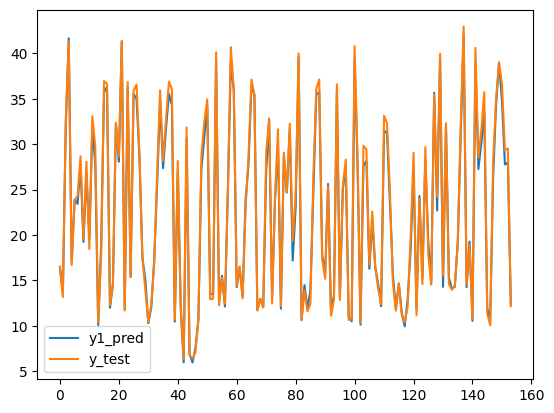

In [58]:
import numpy as np
import matplotlib.pyplot as plt
y_pred = np.array(model.predict(x_test))
y1_pred = y_pred[0].reshape(-1)
y2_pred = y_pred[1].reshape(-1)

plt.plot(y1_pred)
plt.plot(y_test[0])
plt.legend(['y1_pred', 'y_test'])
plt.show()